In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
files = {
    "sputnik": "Sputnik/rn50_time_bs_128.csv",
    'aspt': "../aspt/measurements/measurements_sspmm128.csv"
}

dfs = dict()
for f in files: 
    dfs[f] = pd.read_csv(files[f])

In [3]:
dfs['sputnik'] = dfs['sputnik'].iloc[: , 1:]
dfs['sputnik']['filename'] = dfs['sputnik']['filename'].astype("string")
dfs['sputnik'] = dfs['sputnik'].set_index('filename')
dfs['sputnik'].dtypes
dfs['sputnik']

,time_ms
filename,
dlmc/rn50/extended_magnitude_pruning/0.96/bottleneck_2_block_group4_2_1.mtx,0.053895
dlmc/rn50/extended_magnitude_pruning/0.96/bottleneck_1_block_group3_3_1.mtx,0.015622
dlmc/rn50/extended_magnitude_pruning/0.96/bottleneck_3_block_group_projection_block_group4.mtx,0.026380
dlmc/rn50/extended_magnitude_pruning/0.96/bottleneck_2_block_group3_5_1.mtx,0.024736
dlmc/rn50/extended_magnitude_pruning/0.96/bottleneck_1_block_group_projection_block_group4.mtx,0.019525
...,...
dlmc/rn50/magnitude_pruning/0.98/bottleneck_3_block_group3_4_1.mtx,0.012522
dlmc/rn50/magnitude_pruning/0.98/bottleneck_1_block_group3_2_1.mtx,0.012705
dlmc/rn50/magnitude_pruning/0.98/bottleneck_2_block_group_projection_block_group2.mtx,0.013620


In [4]:
# dfs['aspt'] = dfs['aspt'].assign(time_ms=dfs['aspt']['preproc_ms']+dfs['aspt']['work_ms'])
dfs['aspt'] = dfs['aspt'].rename(columns={'total_ms': 'time_ms'})
dfs['aspt']['filename'] = dfs['aspt']['filename'].astype("string")
dfs['aspt'] = dfs['aspt'].set_index('filename')
dfs['aspt'].dtypes
dfs['aspt']

,variant,time_ms
filename,,
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group1_1_1.mtx,sspmm128,0.550665
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group1_2_1.mtx,sspmm128,0.058439
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group2_1_1.mtx,sspmm128,0.682547
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group2_2_1.mtx,sspmm128,0.673330
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group2_3_1.mtx,sspmm128,0.690542
...,...,...
dlmc/rn50/variational_dropout/0.98/bottleneck_projection_block_group_projection_block_group2.mtx,sspmm128,0.043386
dlmc/rn50/variational_dropout/0.98/bottleneck_projection_block_group_projection_block_group3.mtx,sspmm128,0.047755
dlmc/rn50/variational_dropout/0.98/bottleneck_projection_block_group_projection_block_group4.mtx,sspmm128,0.052616


In [5]:
joined = pd.merge(dfs['aspt'], dfs['sputnik'], on='filename', how='inner', suffixes=('_aspt', '_sputnik'))
joined

,variant,time_ms_aspt,time_ms_sputnik
filename,,,
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group1_1_1.mtx,sspmm128,0.550665,0.012235
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group1_2_1.mtx,sspmm128,0.058439,0.012408
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group2_1_1.mtx,sspmm128,0.682547,0.018904
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group2_2_1.mtx,sspmm128,0.673330,0.019372
dlmc/rn50/extended_magnitude_pruning/0.8/bottleneck_1_block_group2_3_1.mtx,sspmm128,0.690542,0.018458
...,...,...,...
dlmc/rn50/variational_dropout/0.98/bottleneck_projection_block_group_projection_block_group2.mtx,sspmm128,0.043386,0.012809
dlmc/rn50/variational_dropout/0.98/bottleneck_projection_block_group_projection_block_group3.mtx,sspmm128,0.047755,0.014292
dlmc/rn50/variational_dropout/0.98/bottleneck_projection_block_group_projection_block_group4.mtx,sspmm128,0.052616,0.023747


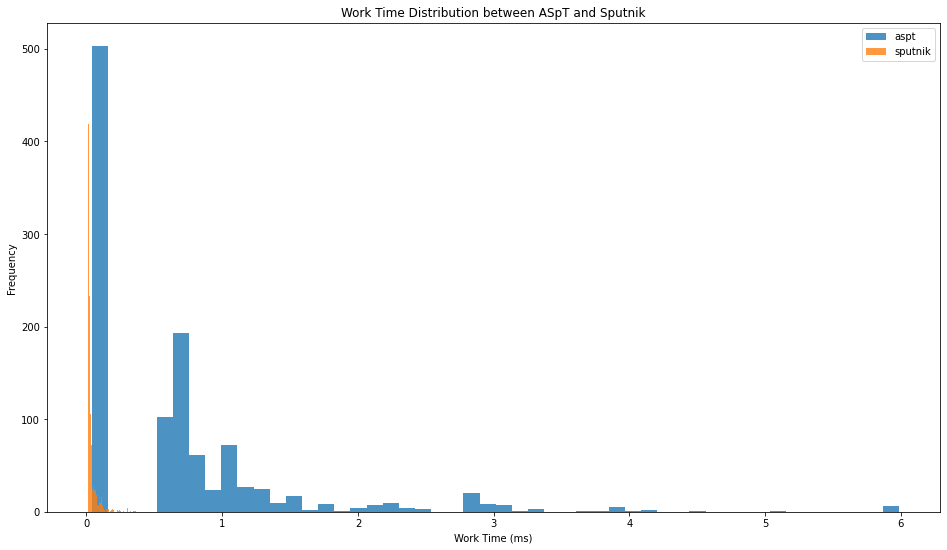

In [6]:
plt.figure(figsize=(16,9))
plt.hist(joined['time_ms_aspt'], label='aspt', bins=50, alpha=0.8)
plt.hist(joined['time_ms_sputnik'], label='sputnik', bins=50, alpha=0.8)
plt.legend()
plt.xlabel("Work Time (ms)")
plt.ylabel("Frequency")
plt.title("Work Time Distribution between ASpT and Sputnik")
plt.show()

/tmp/ipykernel_1311536/1143153546.py:12: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0)


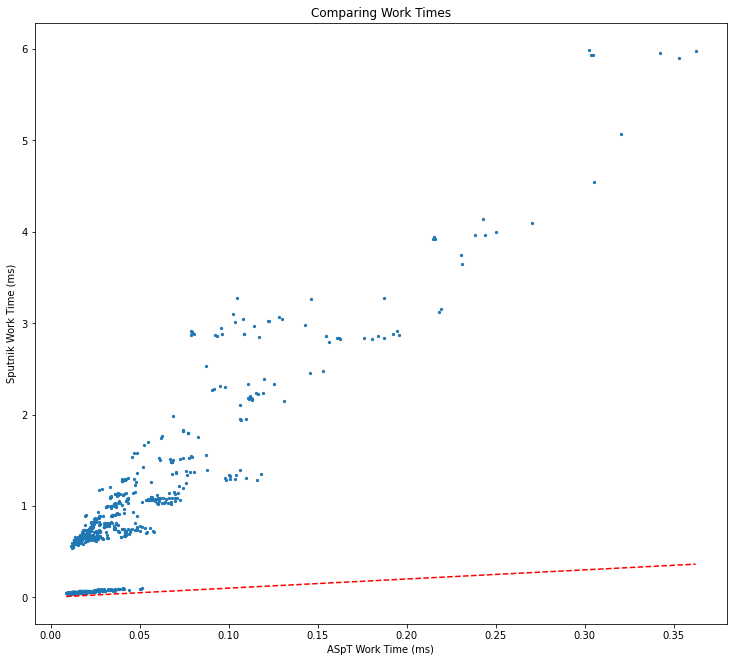

In [7]:
plt.figure(figsize=(10,9))
plt.scatter(joined['time_ms_sputnik'], joined['time_ms_aspt'], s=5)

mu, stdev = np.average(joined['time_ms_sputnik']), np.std(joined['time_ms_sputnik'])
m1, m2 = np.amin(joined['time_ms_sputnik']), np.amax(joined['time_ms_sputnik'])
xs = np.linspace(m1, m2)
plt.plot(xs, xs, linestyle='--', c='red')
# plt.legend()
plt.xlabel("ASpT Work Time (ms)")
plt.ylabel("Sputnik Work Time (ms)")
plt.title("Comparing Work Times")
plt.tight_layout(0)
plt.show()

## Plot Runtime by Category

In [8]:
sputnik = dfs['sputnik'].assign(impl='sputnik').reset_index()[['filename', 'time_ms', 'impl']]
aspt = dfs['aspt'].assign(impl='aspt', time_ms=dfs['aspt']['time_ms']).reset_index()[['filename', 'time_ms', 'impl']]
merged = pd.concat((sputnik, aspt))

merged = merged.assign(prefix=merged['filename'].apply(lambda fn: f"{fn.split('/')[2]}_{fn.split('/')[3]}"))
merged = merged.assign(basename=merged['filename'].apply(os.path.basename))
merged = merged.assign(pruning=merged['prefix'].apply(lambda fn: "_".join(fn.split("_")[:-1])))
merged = merged.assign(prune_perc=merged['prefix'].apply(lambda fn: fn.split("_")[-1]))
merged

,filename,time_ms,impl,prefix,basename,pruning,prune_perc
0,dlmc/rn50/extended_magnitude_pruning/0.96/bott...,0.053895,sputnik,extended_magnitude_pruning_0.96,bottleneck_2_block_group4_2_1.mtx,extended_magnitude_pruning,0.96
1,dlmc/rn50/extended_magnitude_pruning/0.96/bott...,0.015622,sputnik,extended_magnitude_pruning_0.96,bottleneck_1_block_group3_3_1.mtx,extended_magnitude_pruning,0.96
2,dlmc/rn50/extended_magnitude_pruning/0.96/bott...,0.026380,sputnik,extended_magnitude_pruning_0.96,bottleneck_3_block_group_projection_block_grou...,extended_magnitude_pruning,0.96
3,dlmc/rn50/extended_magnitude_pruning/0.96/bott...,0.024736,sputnik,extended_magnitude_pruning_0.96,bottleneck_2_block_group3_5_1.mtx,extended_magnitude_pruning,0.96
4,dlmc/rn50/extended_magnitude_pruning/0.96/bott...,0.019525,sputnik,extended_magnitude_pruning_0.96,bottleneck_1_block_group_projection_block_grou...,extended_magnitude_pruning,0.96
...,...,...,...,...,...,...,...
1125,dlmc/rn50/variational_dropout/0.98/bottleneck_...,0.043386,aspt,variational_dropout_0.98,bottleneck_projection_block_group_projection_b...,variational_dropout,0.98
1126,dlmc/rn50/variational_dropout/0.98/bottleneck_...,0.047755,aspt,variational_dropout_0.98,bottleneck_projection_block_group_projection_b...,variational_dropout,0.98
1127,dlmc/rn50/variational_dropout/0.98/bottleneck_...,0.052616,aspt,variational_dropout_0.98,bottleneck_projection_block_group_projection_b...,variational_dropout,0.98
1128,dlmc/rn50/variational_dropout/0.98/final_dense...,0.753259,aspt,variational_dropout_0.98,final_dense.mtx,variational_dropout,0.98


/home/jim/research/paramath/venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


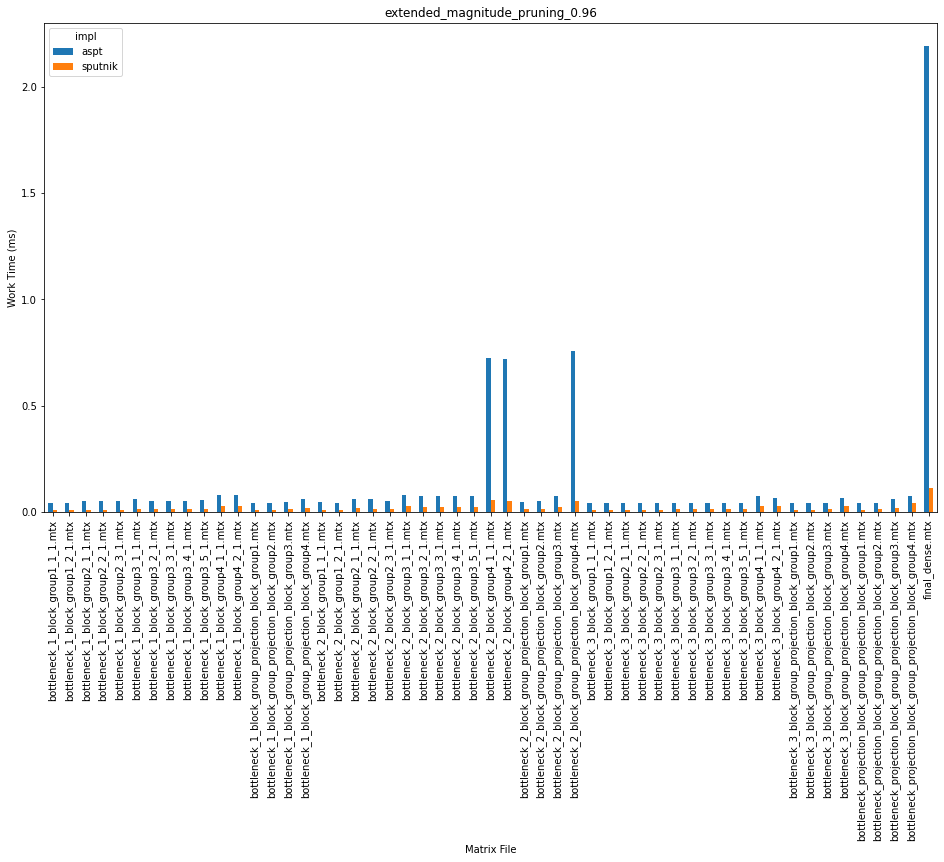

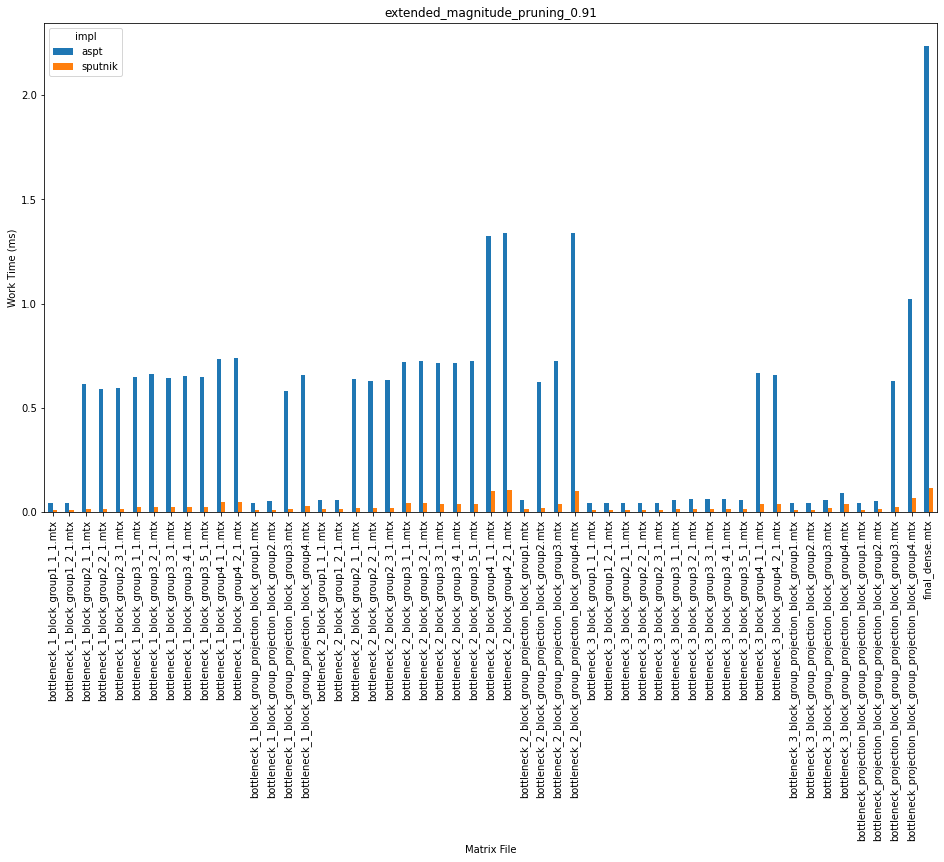

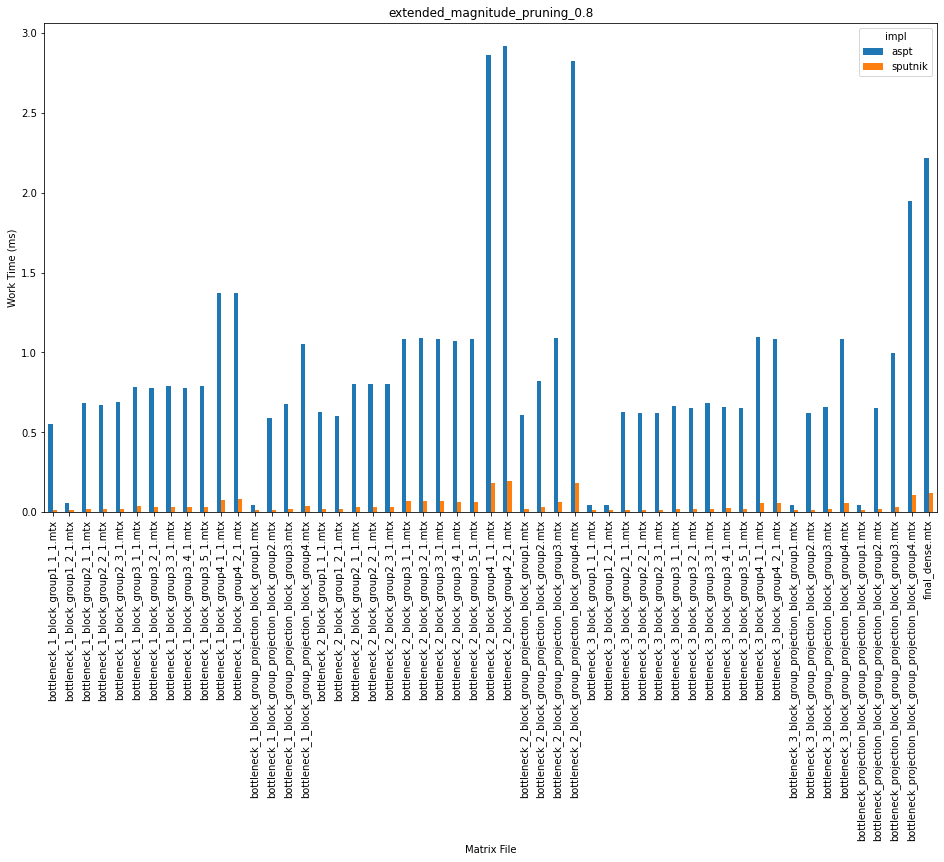

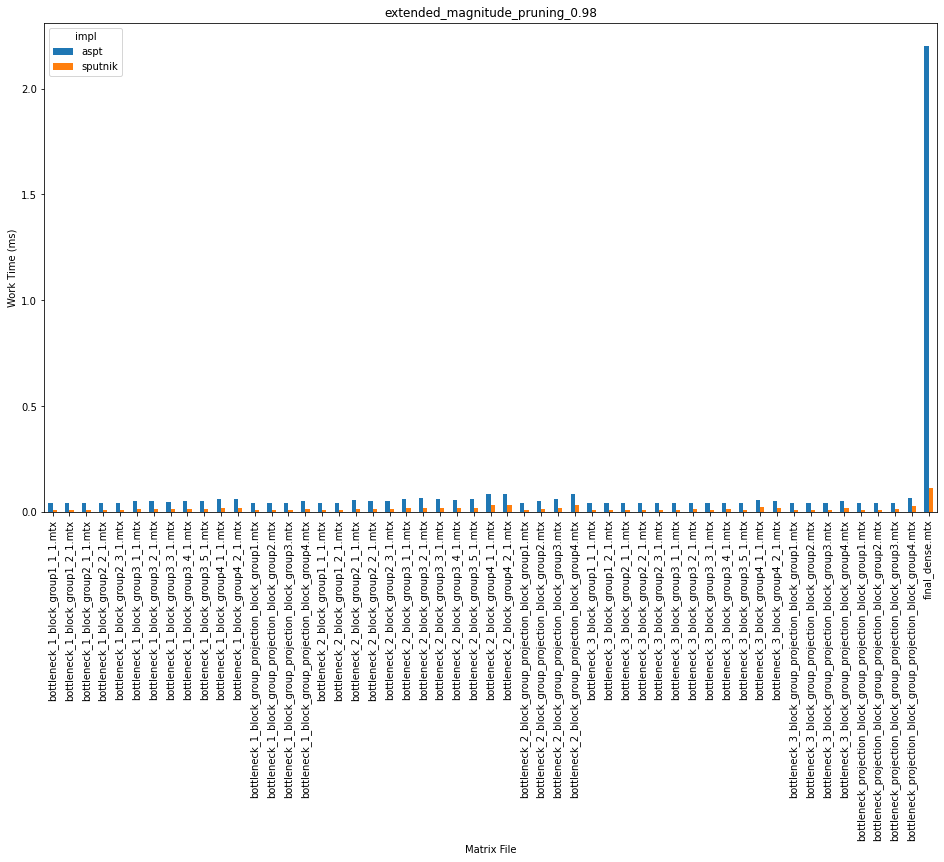

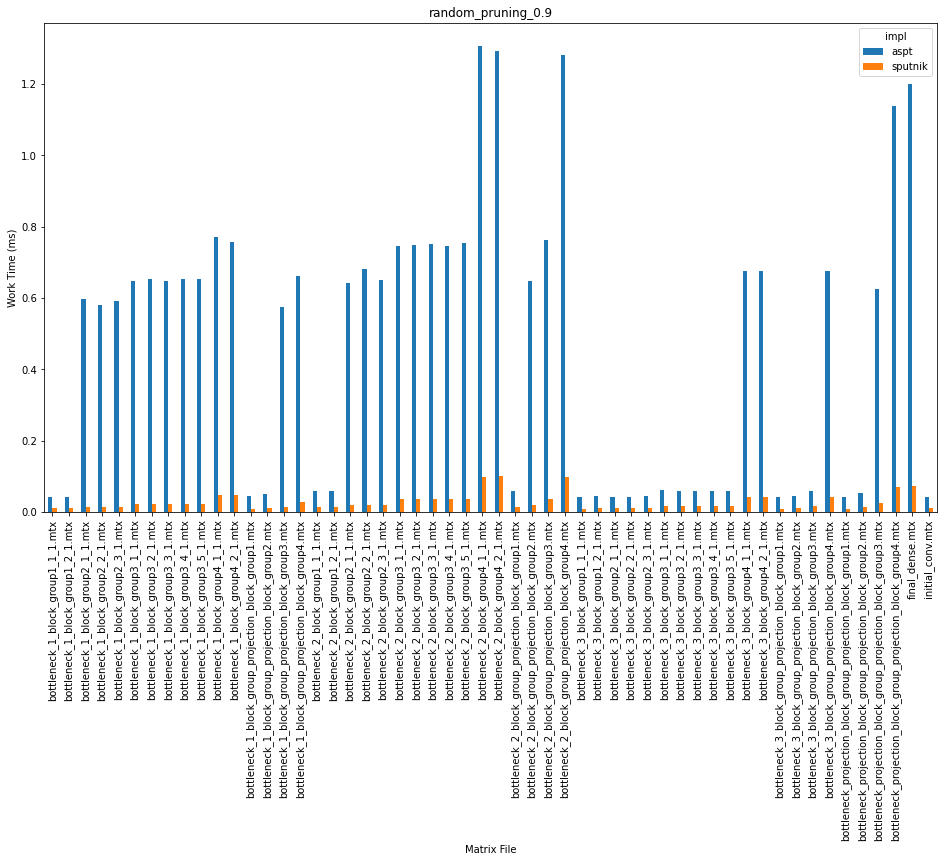

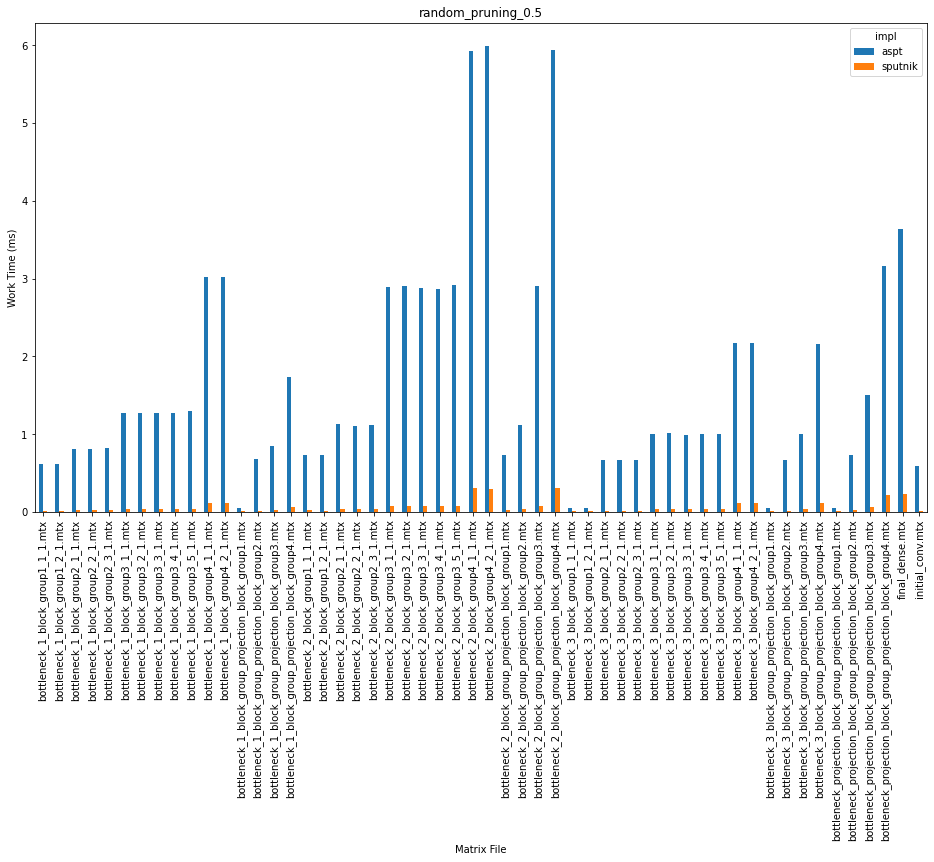

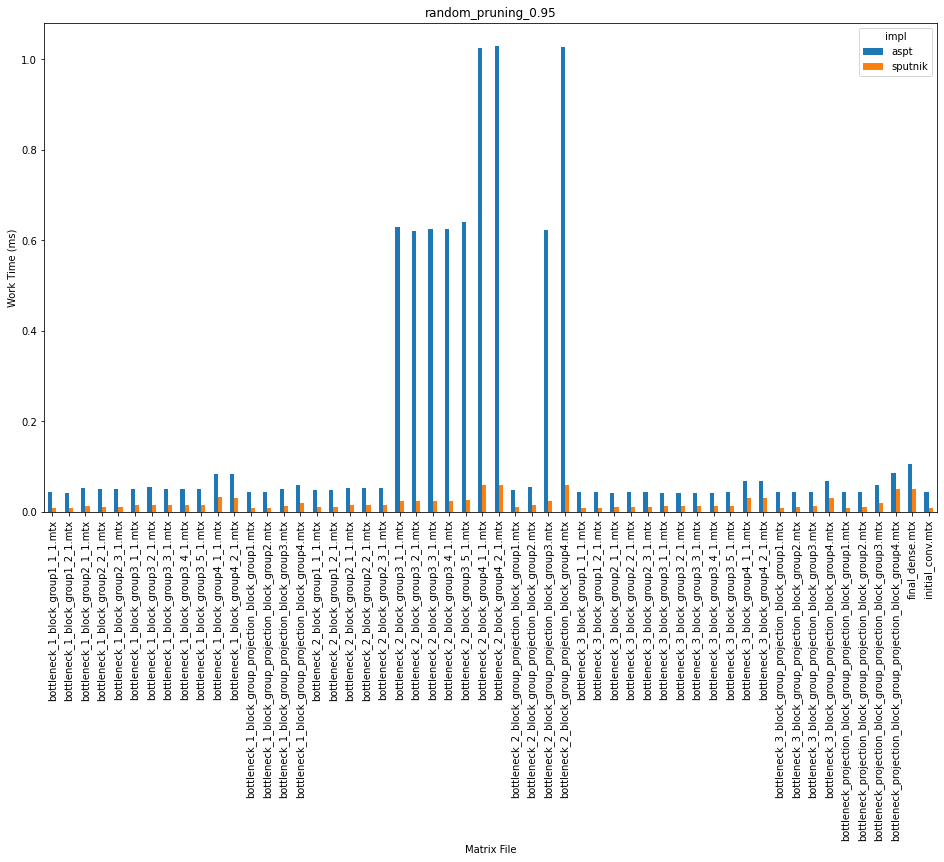

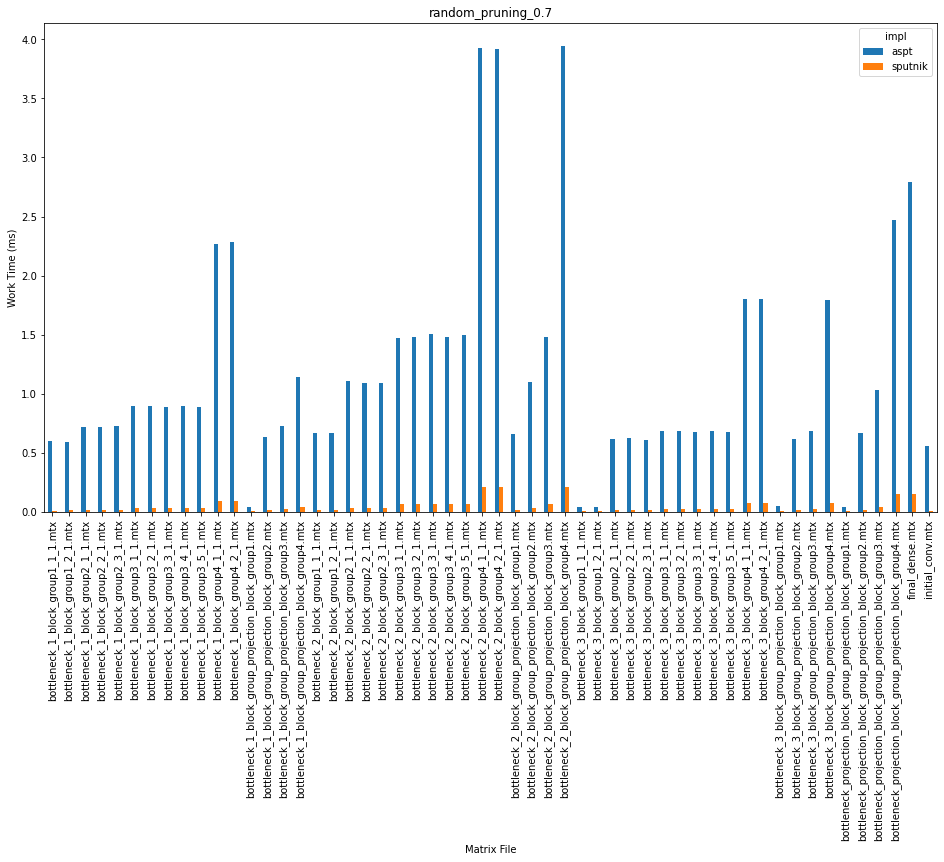

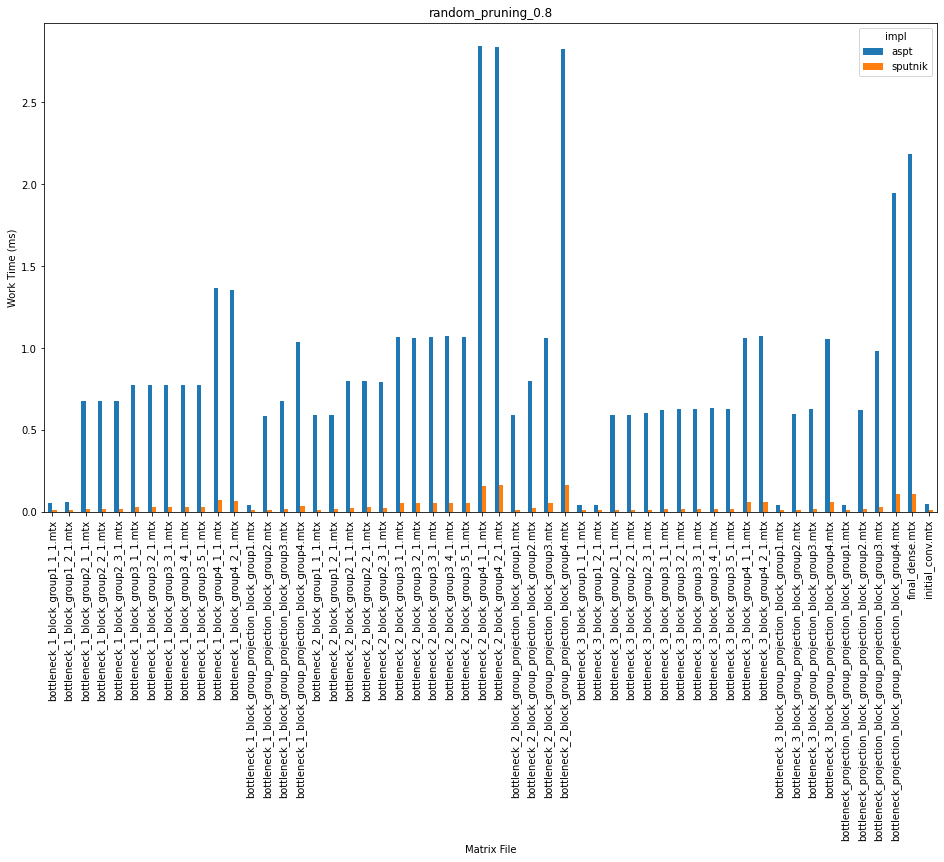

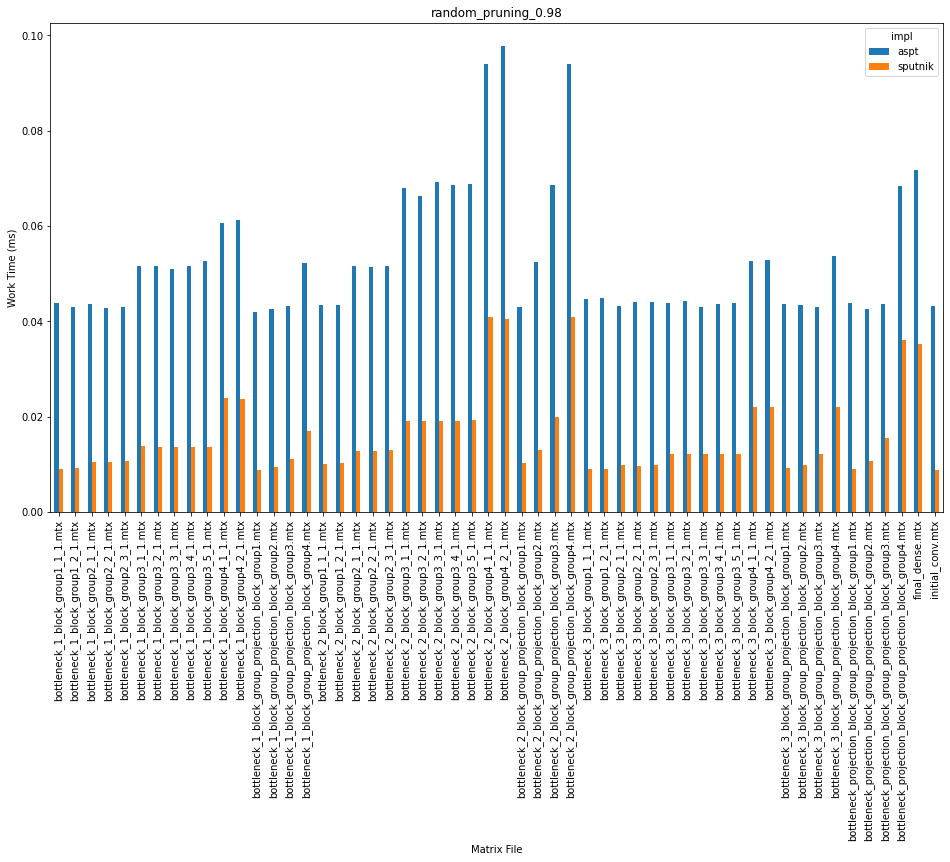

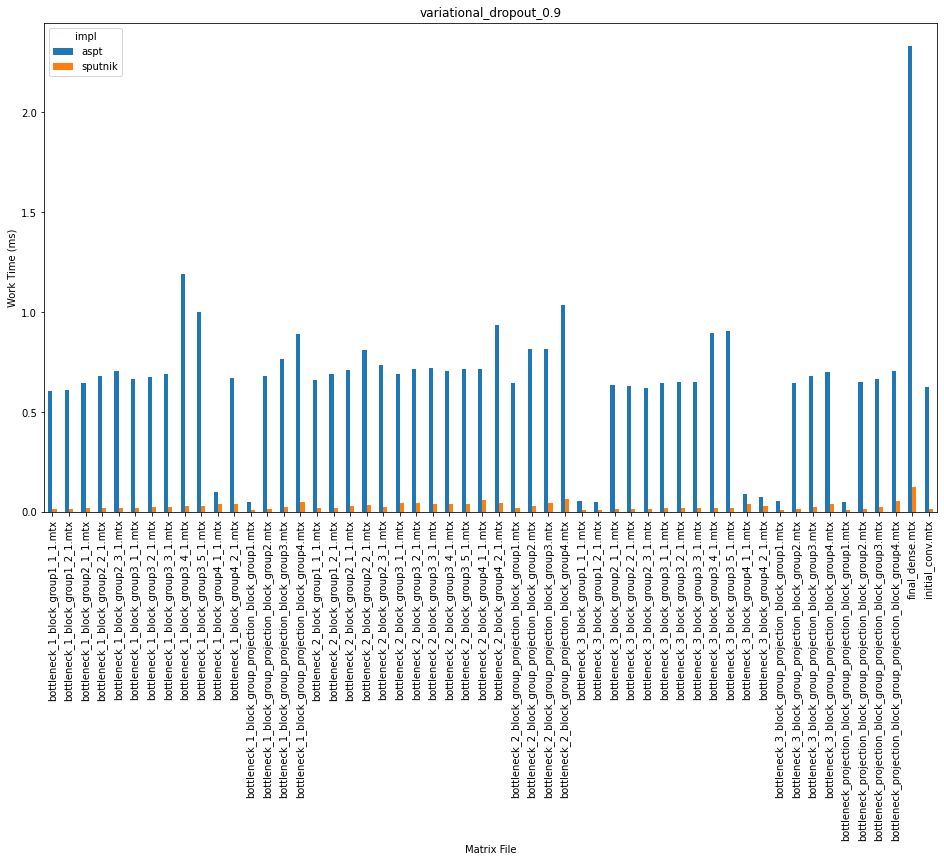

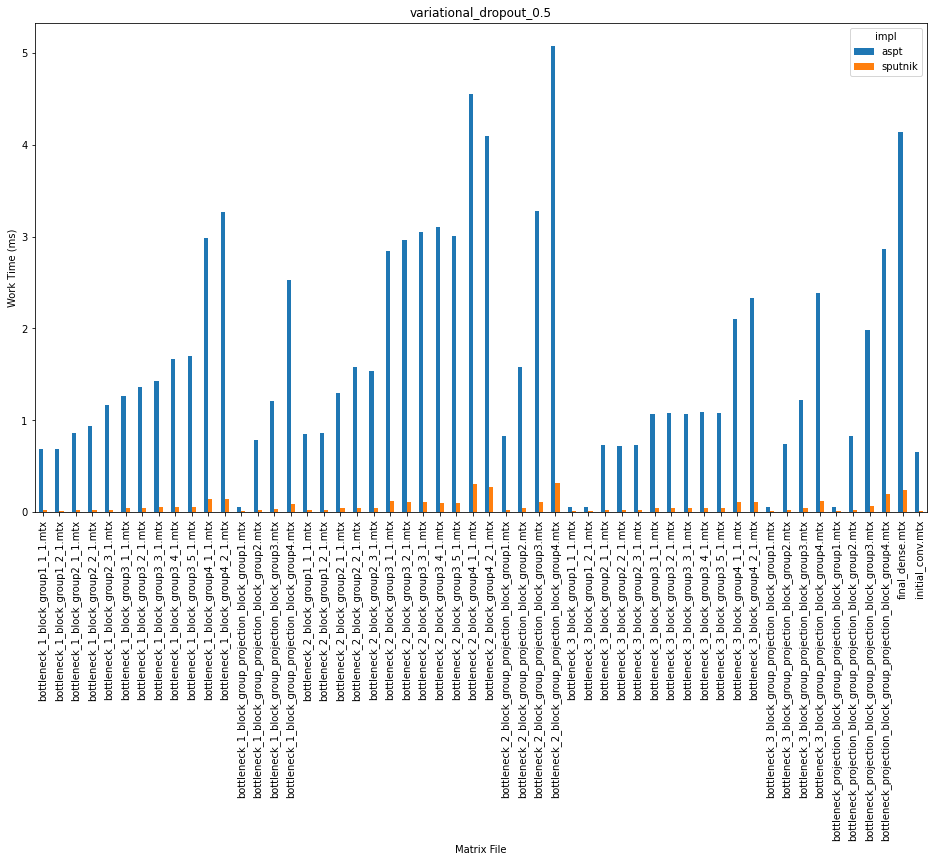

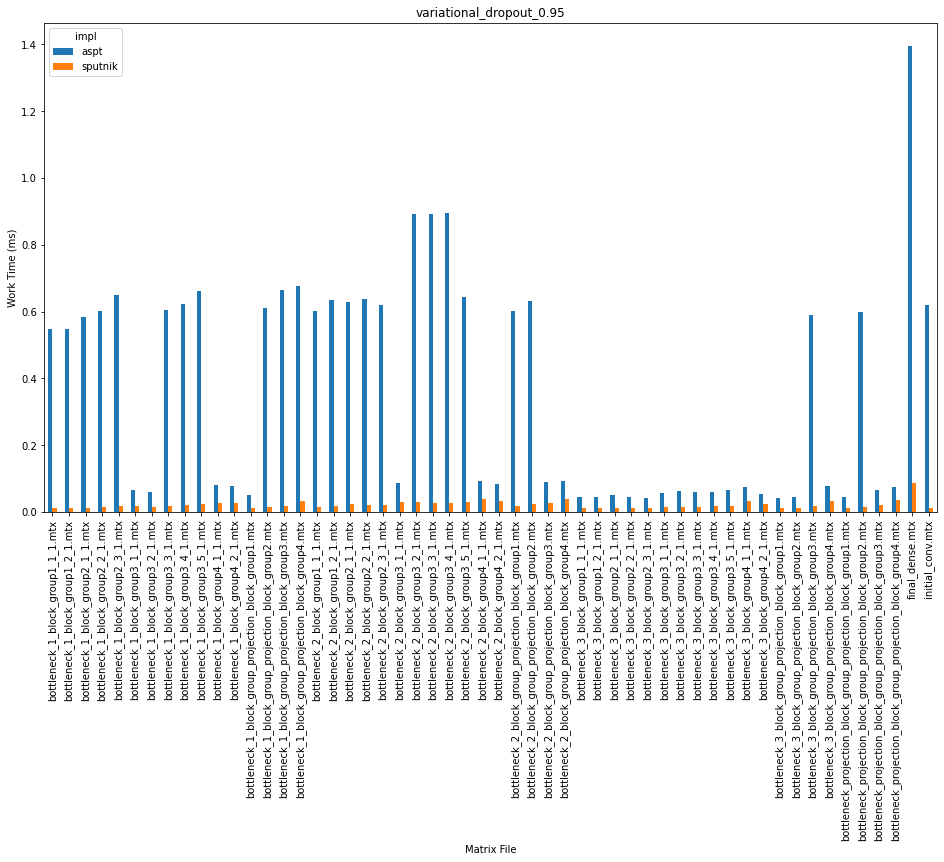

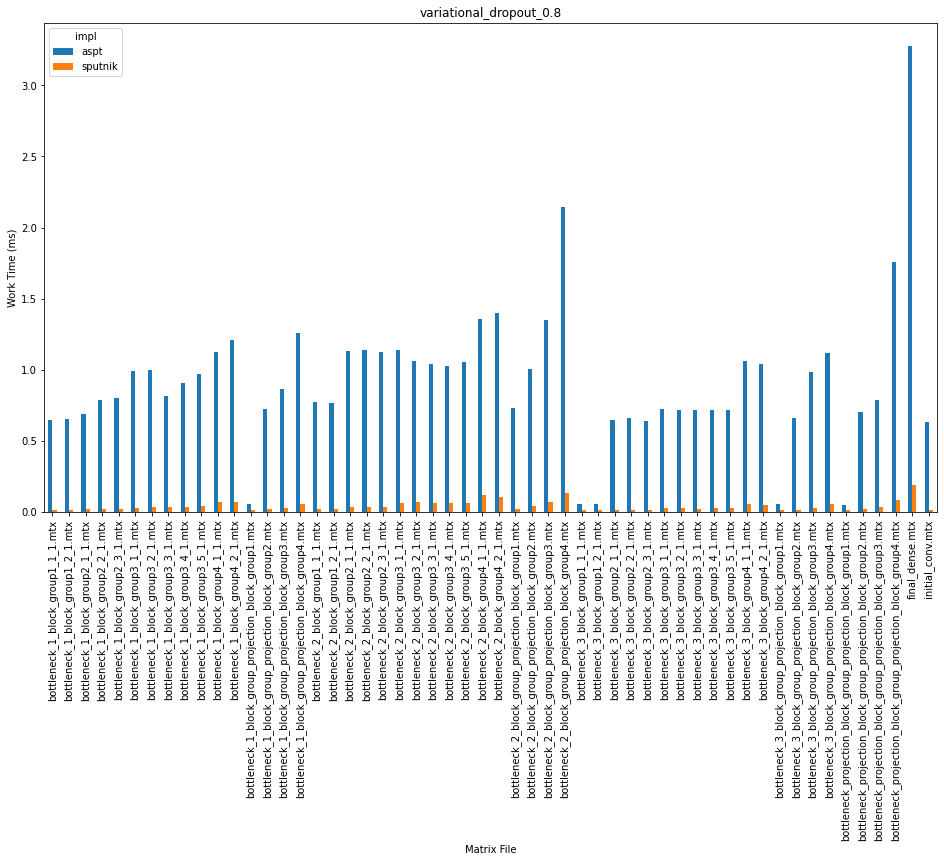

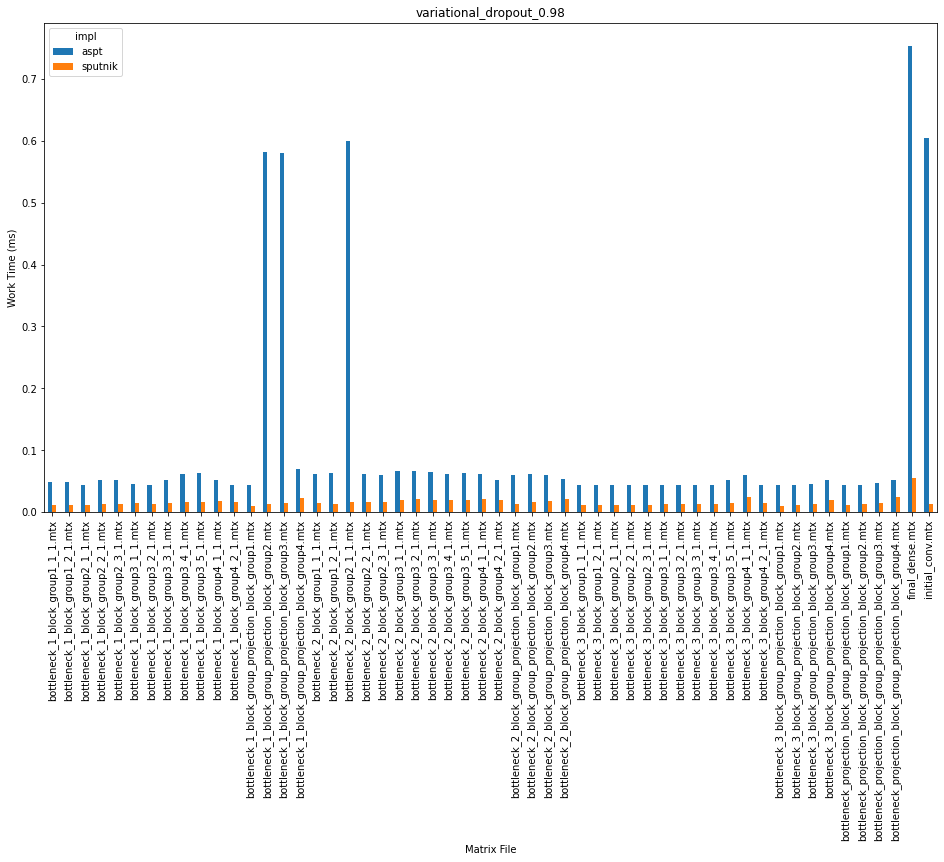

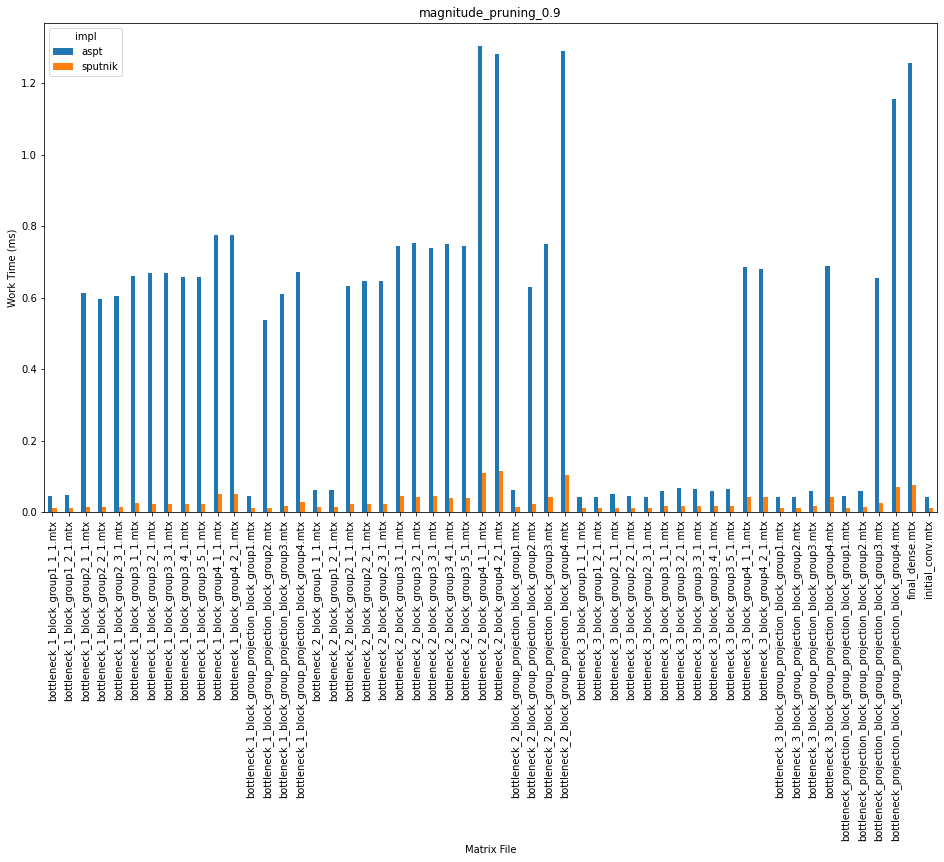

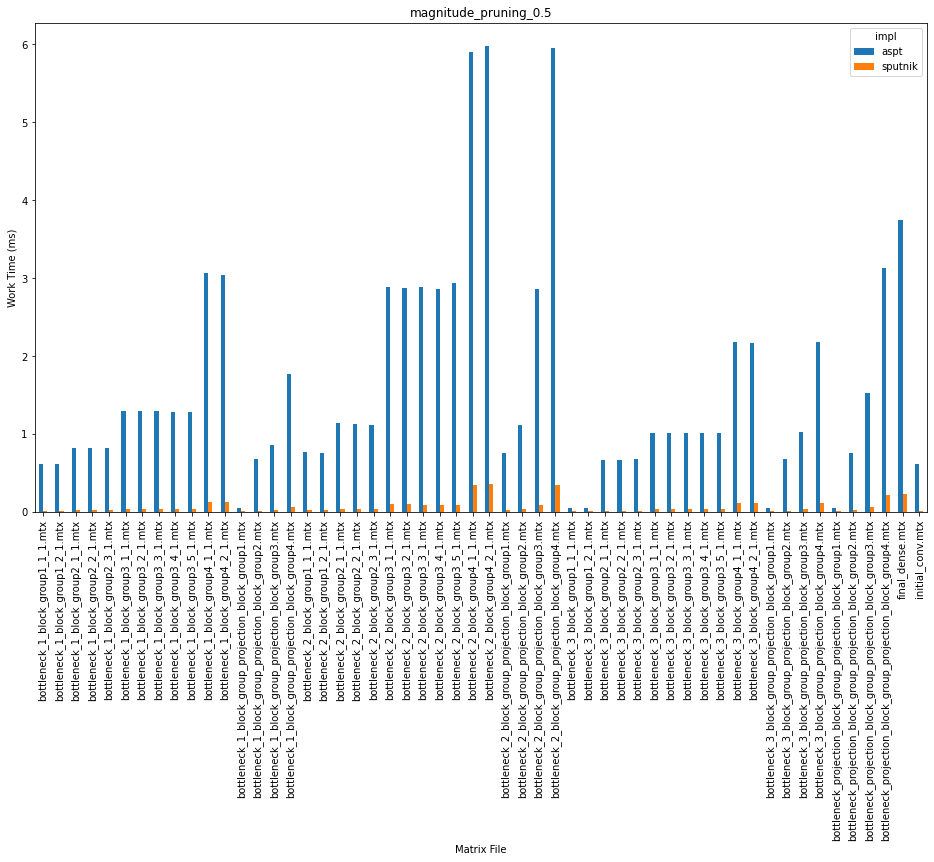

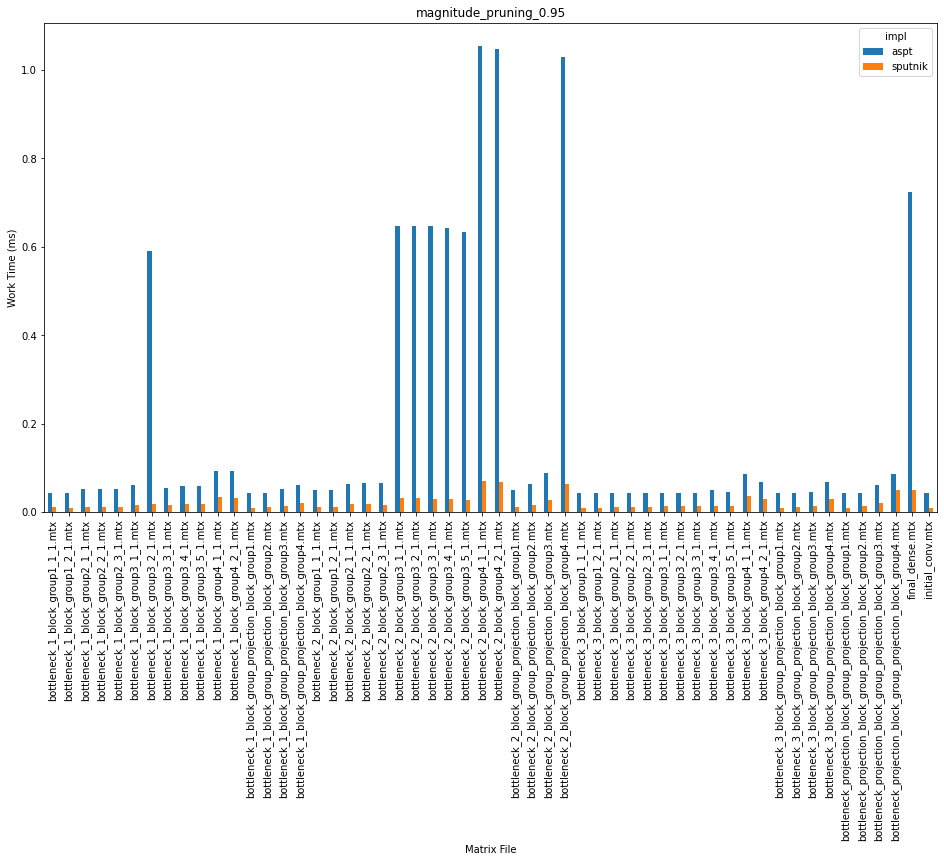

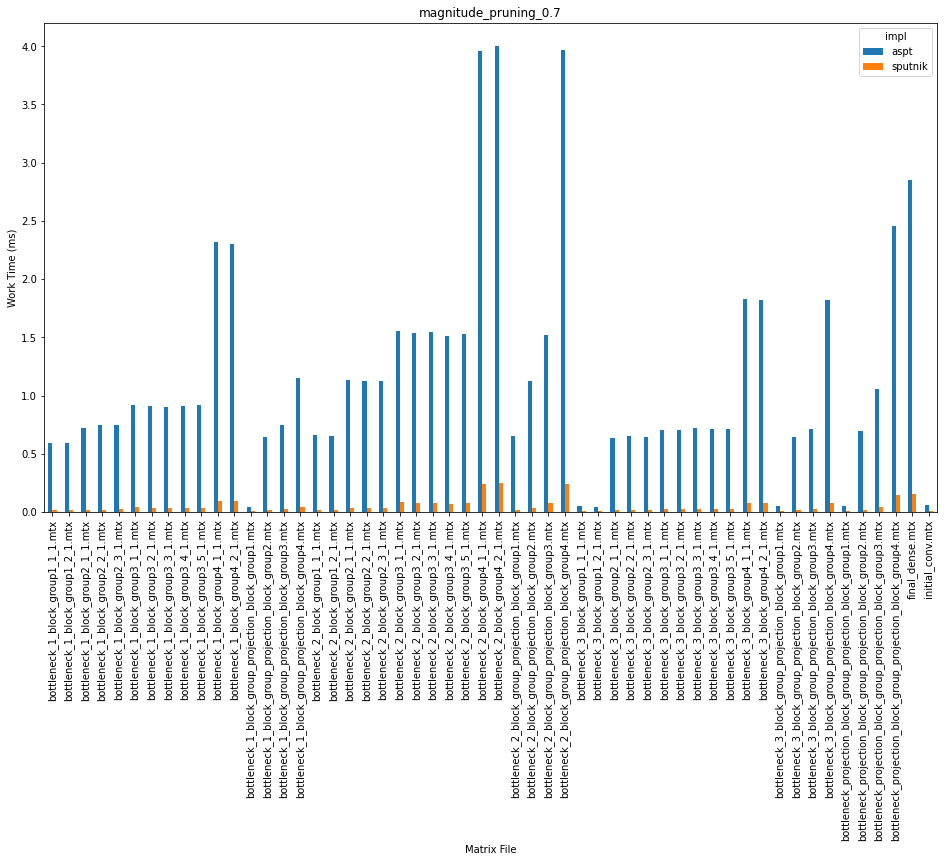

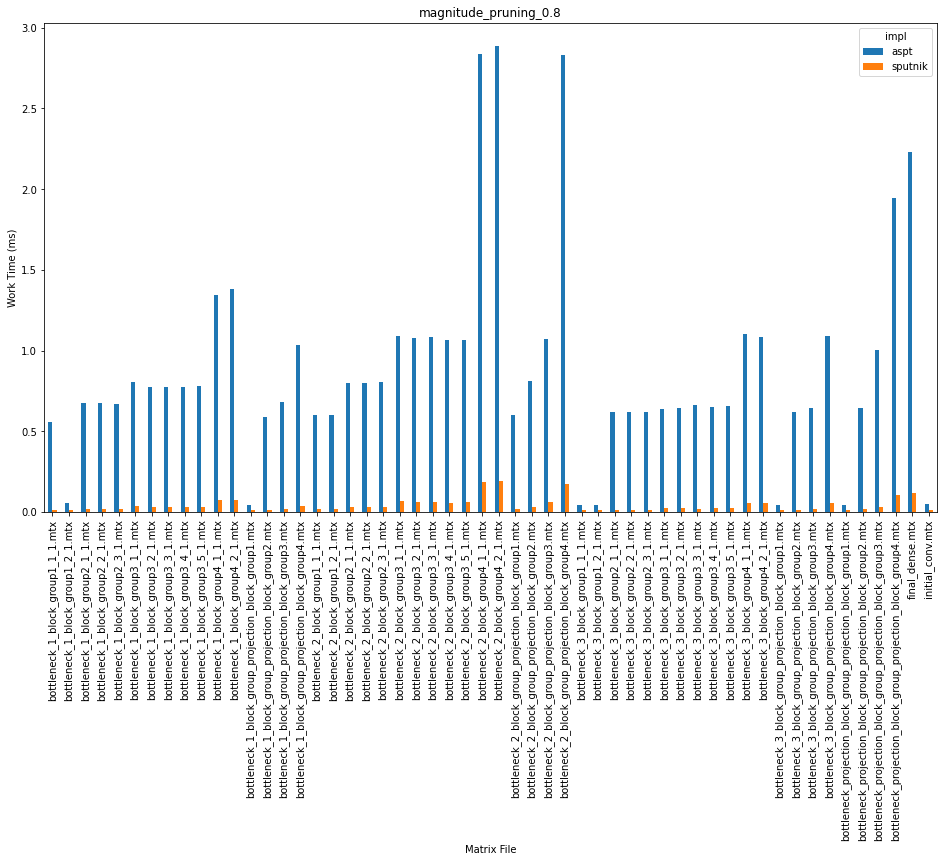

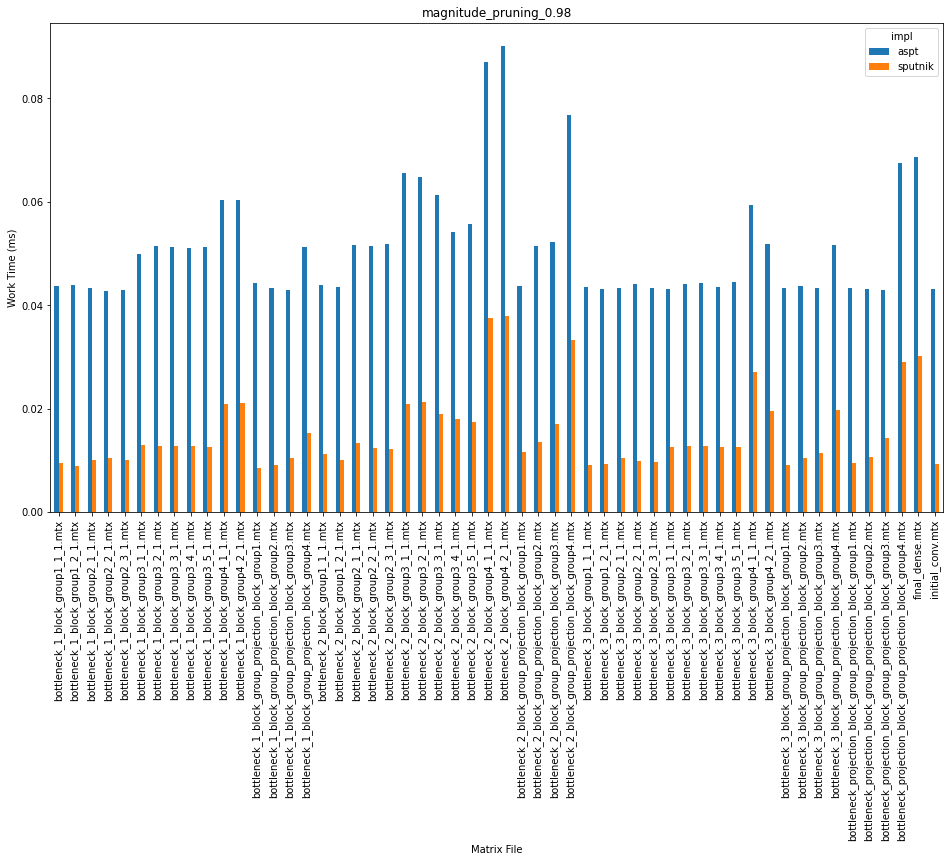

In [9]:
prefixes = merged['prefix'].drop_duplicates().tolist()

for prefix in prefixes:
    filtered = merged[merged['prefix']==prefix]
    filtered.pivot(index='basename', columns='impl', values='time_ms').plot(
        kind='bar',
        figsize=(16,9),
        title=prefix,
        xlabel="Matrix File",
        ylabel="Work Time (ms)"
    )

# Plot ASpT by Pruning Method

[0.8, 0.9, 0.96, 0.5, 0.95, 0.98, 0.91, 0.7]


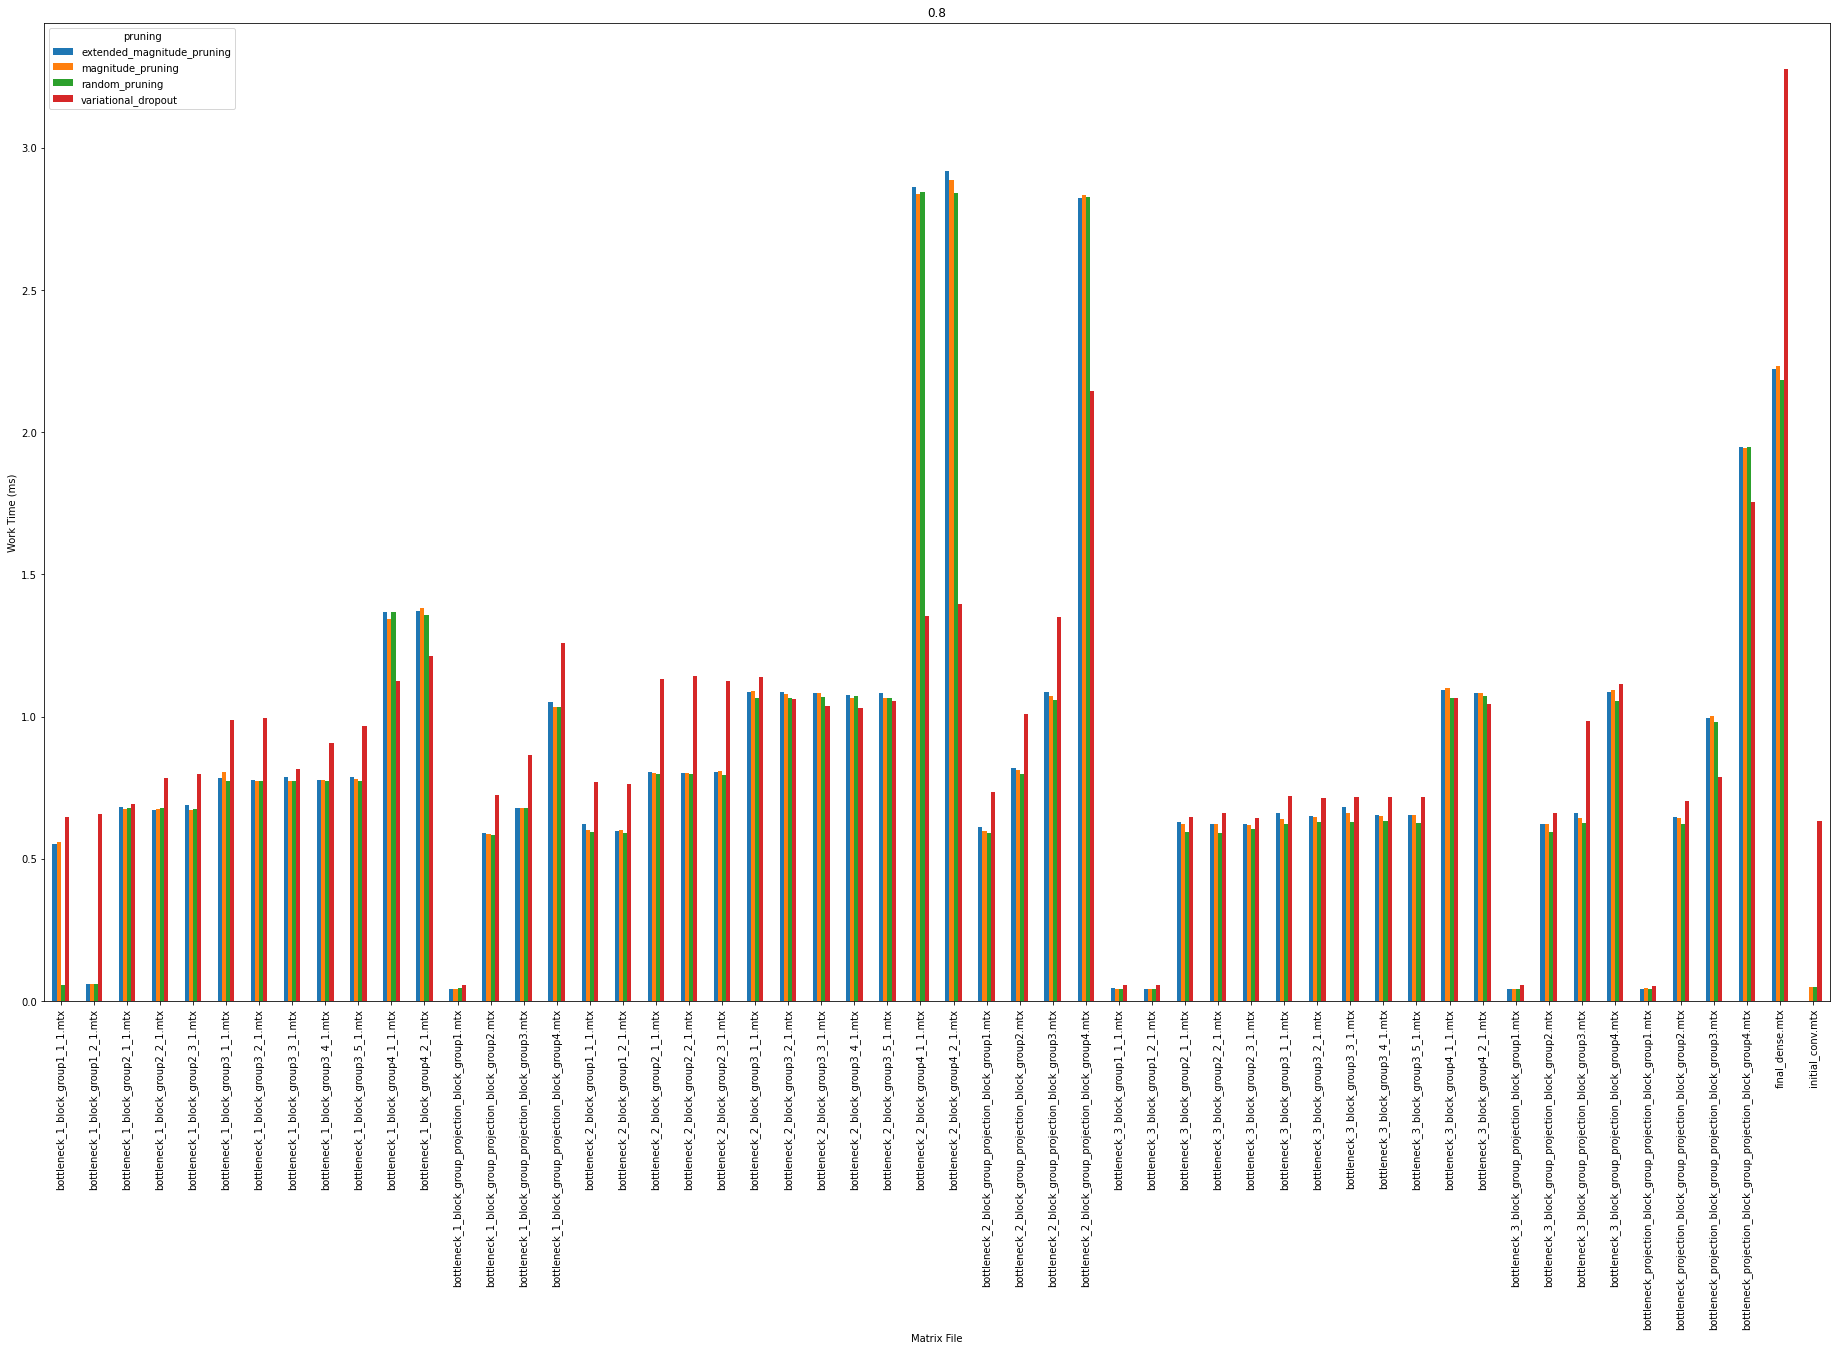

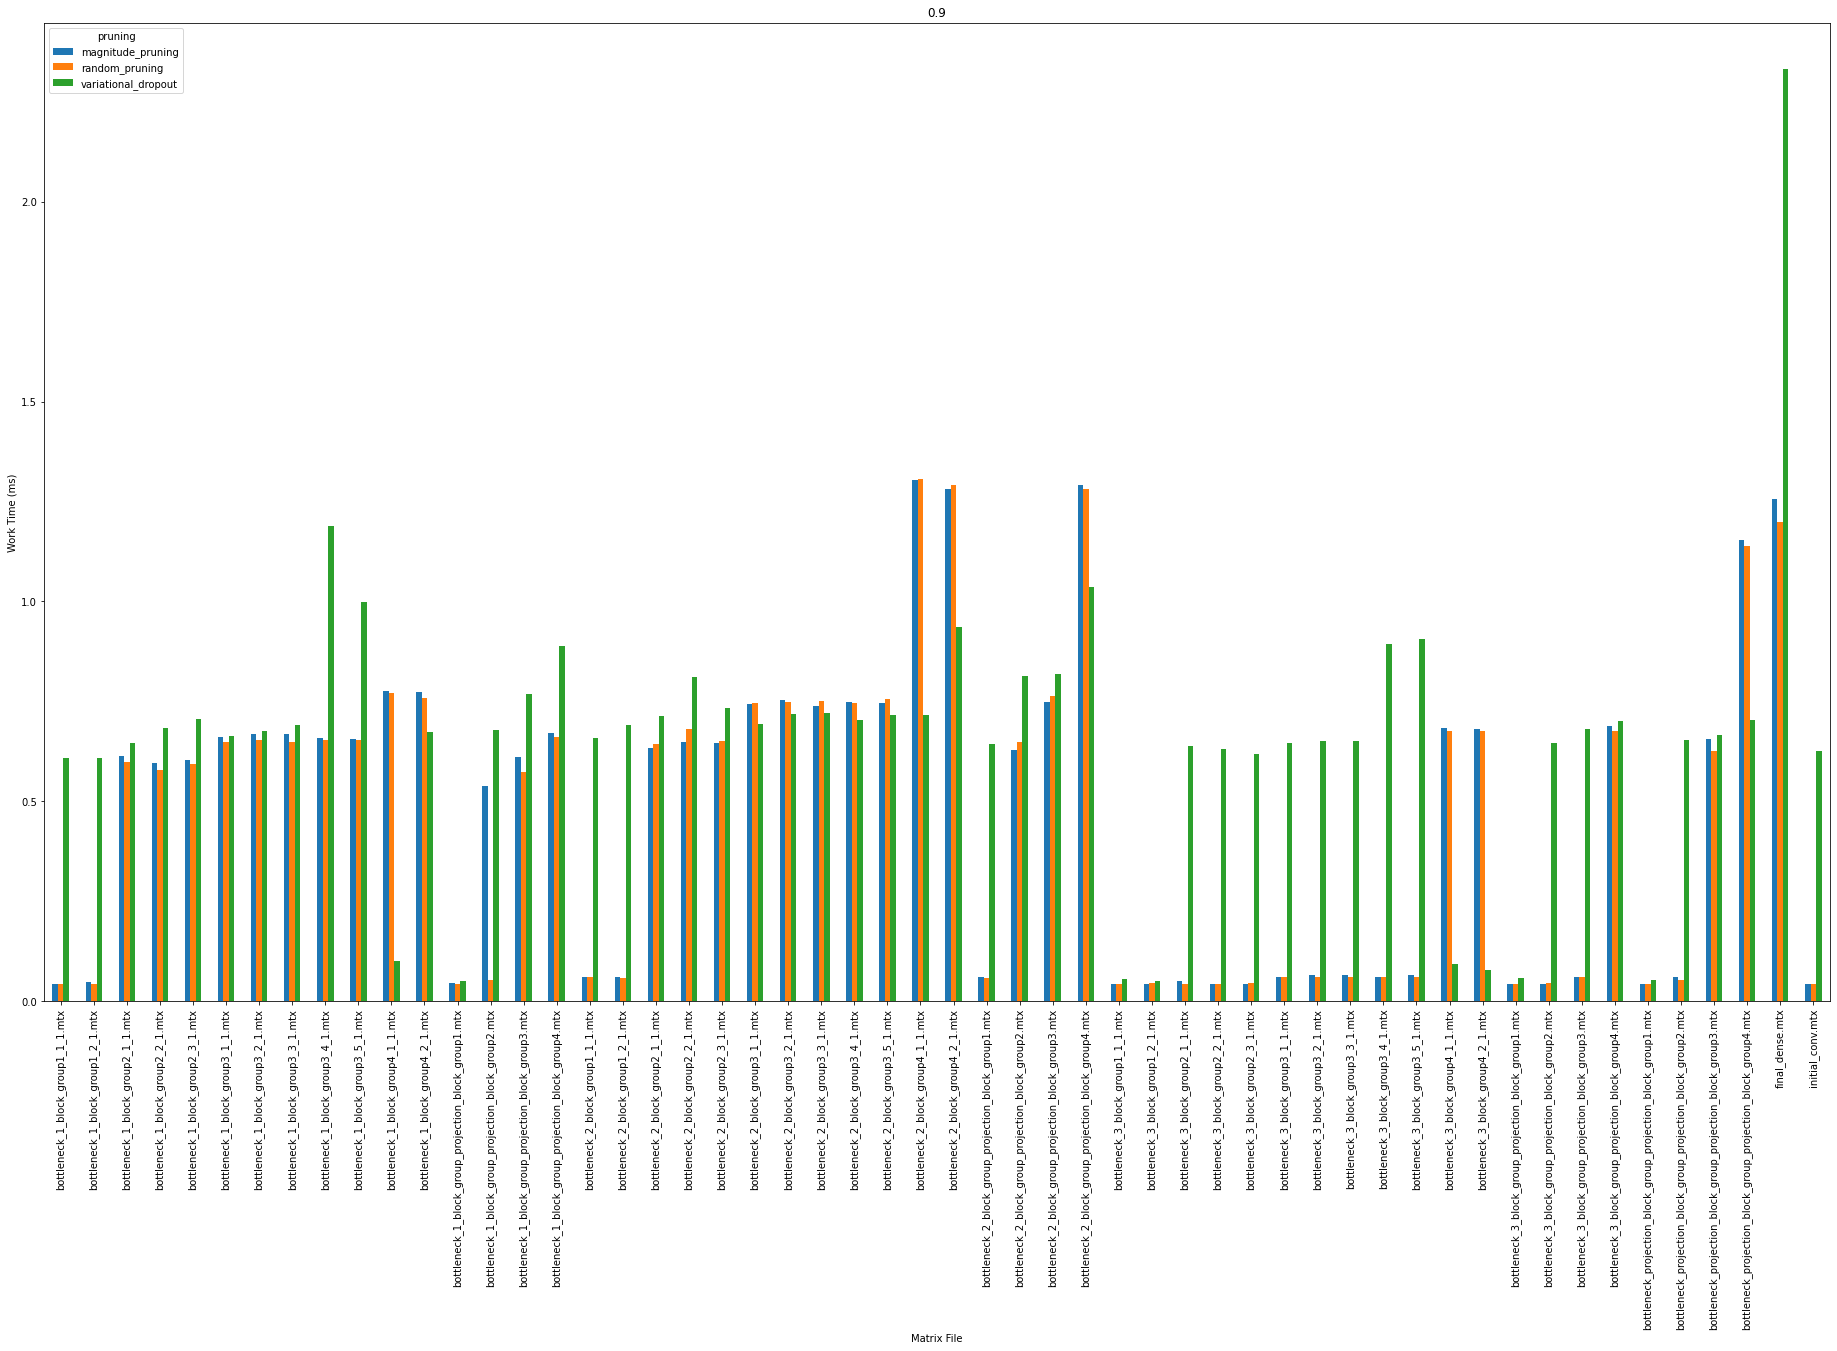

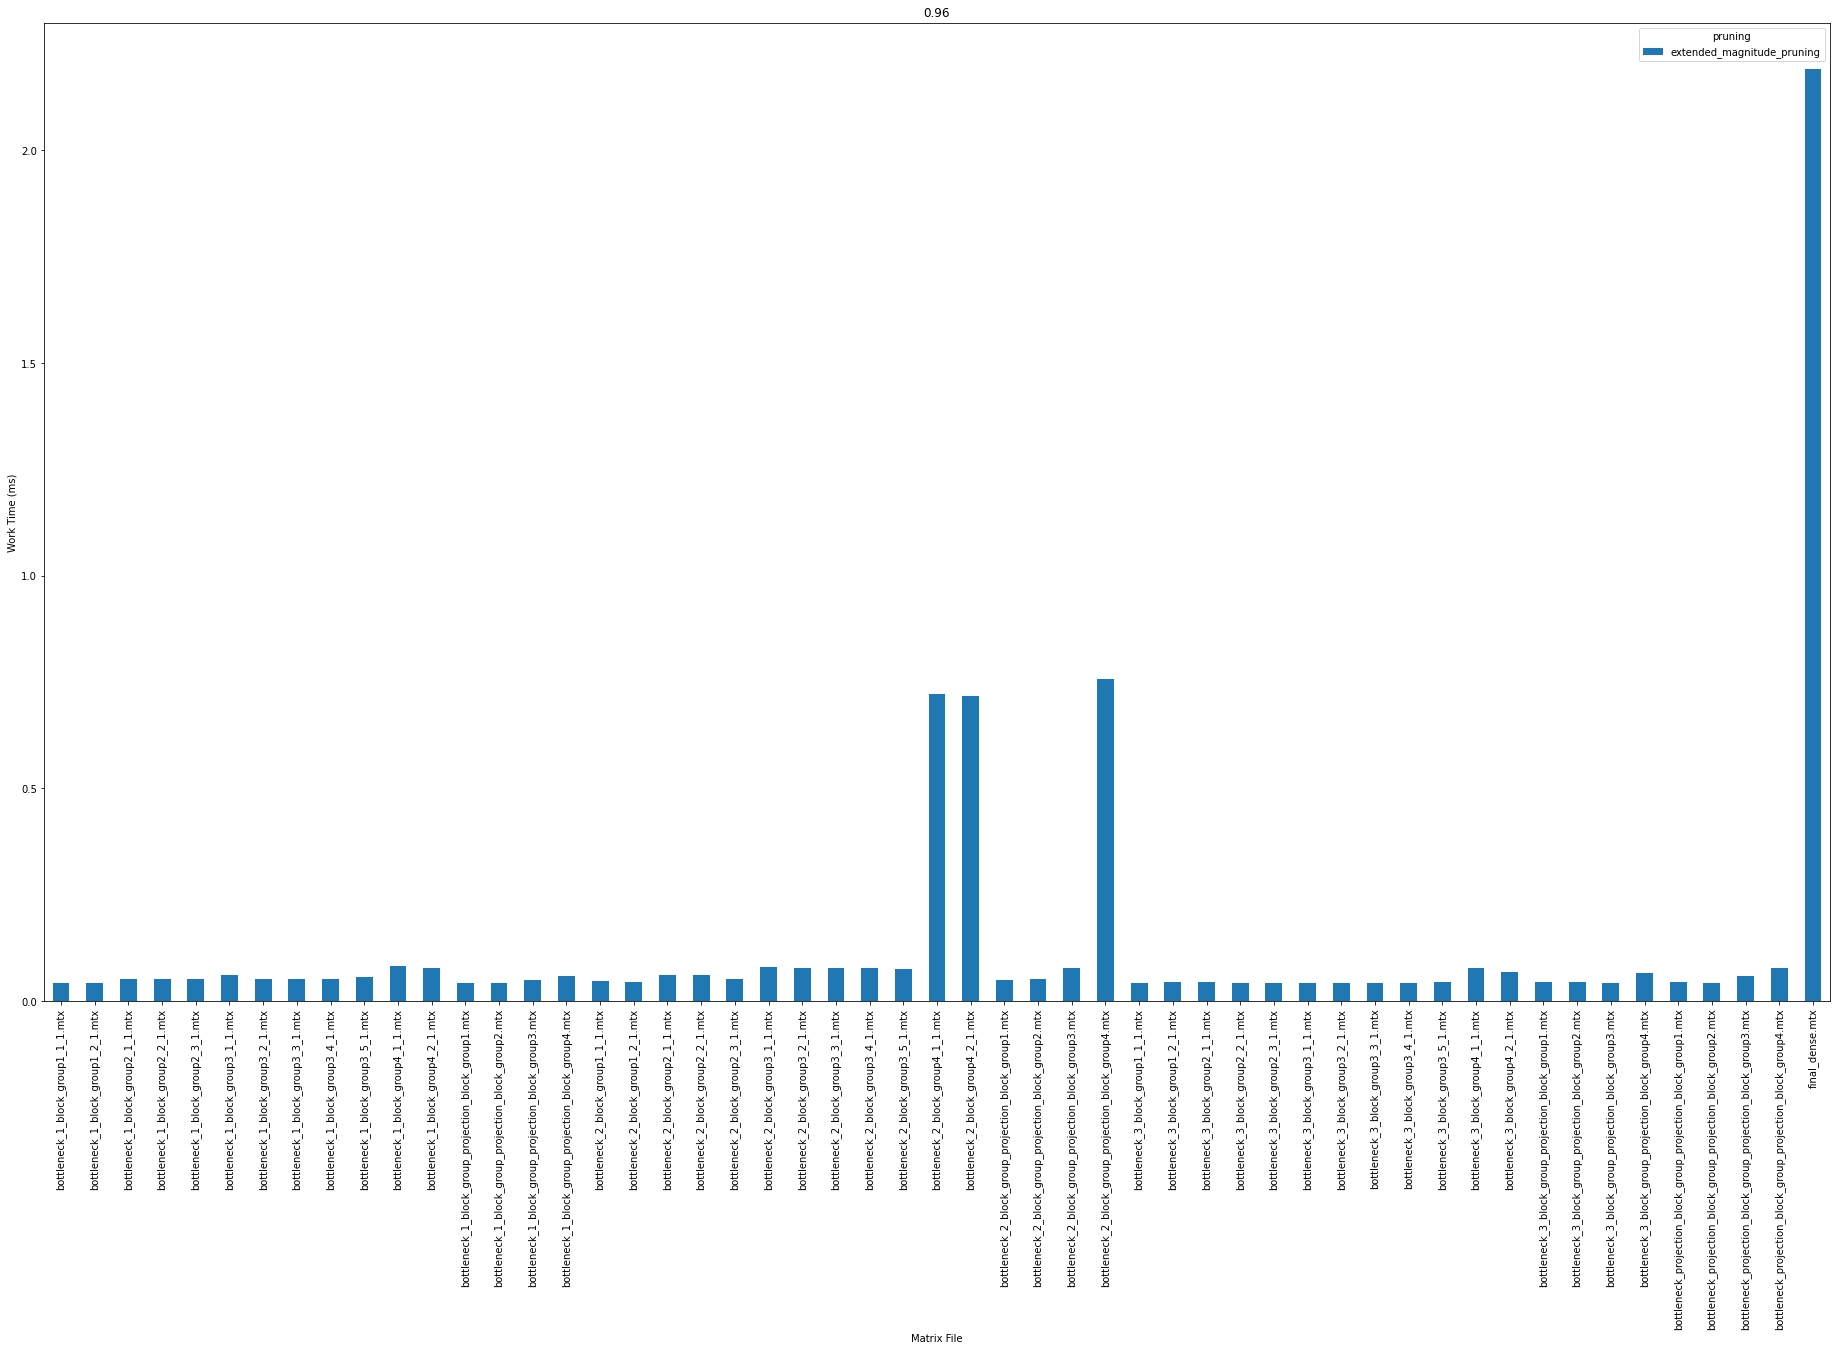

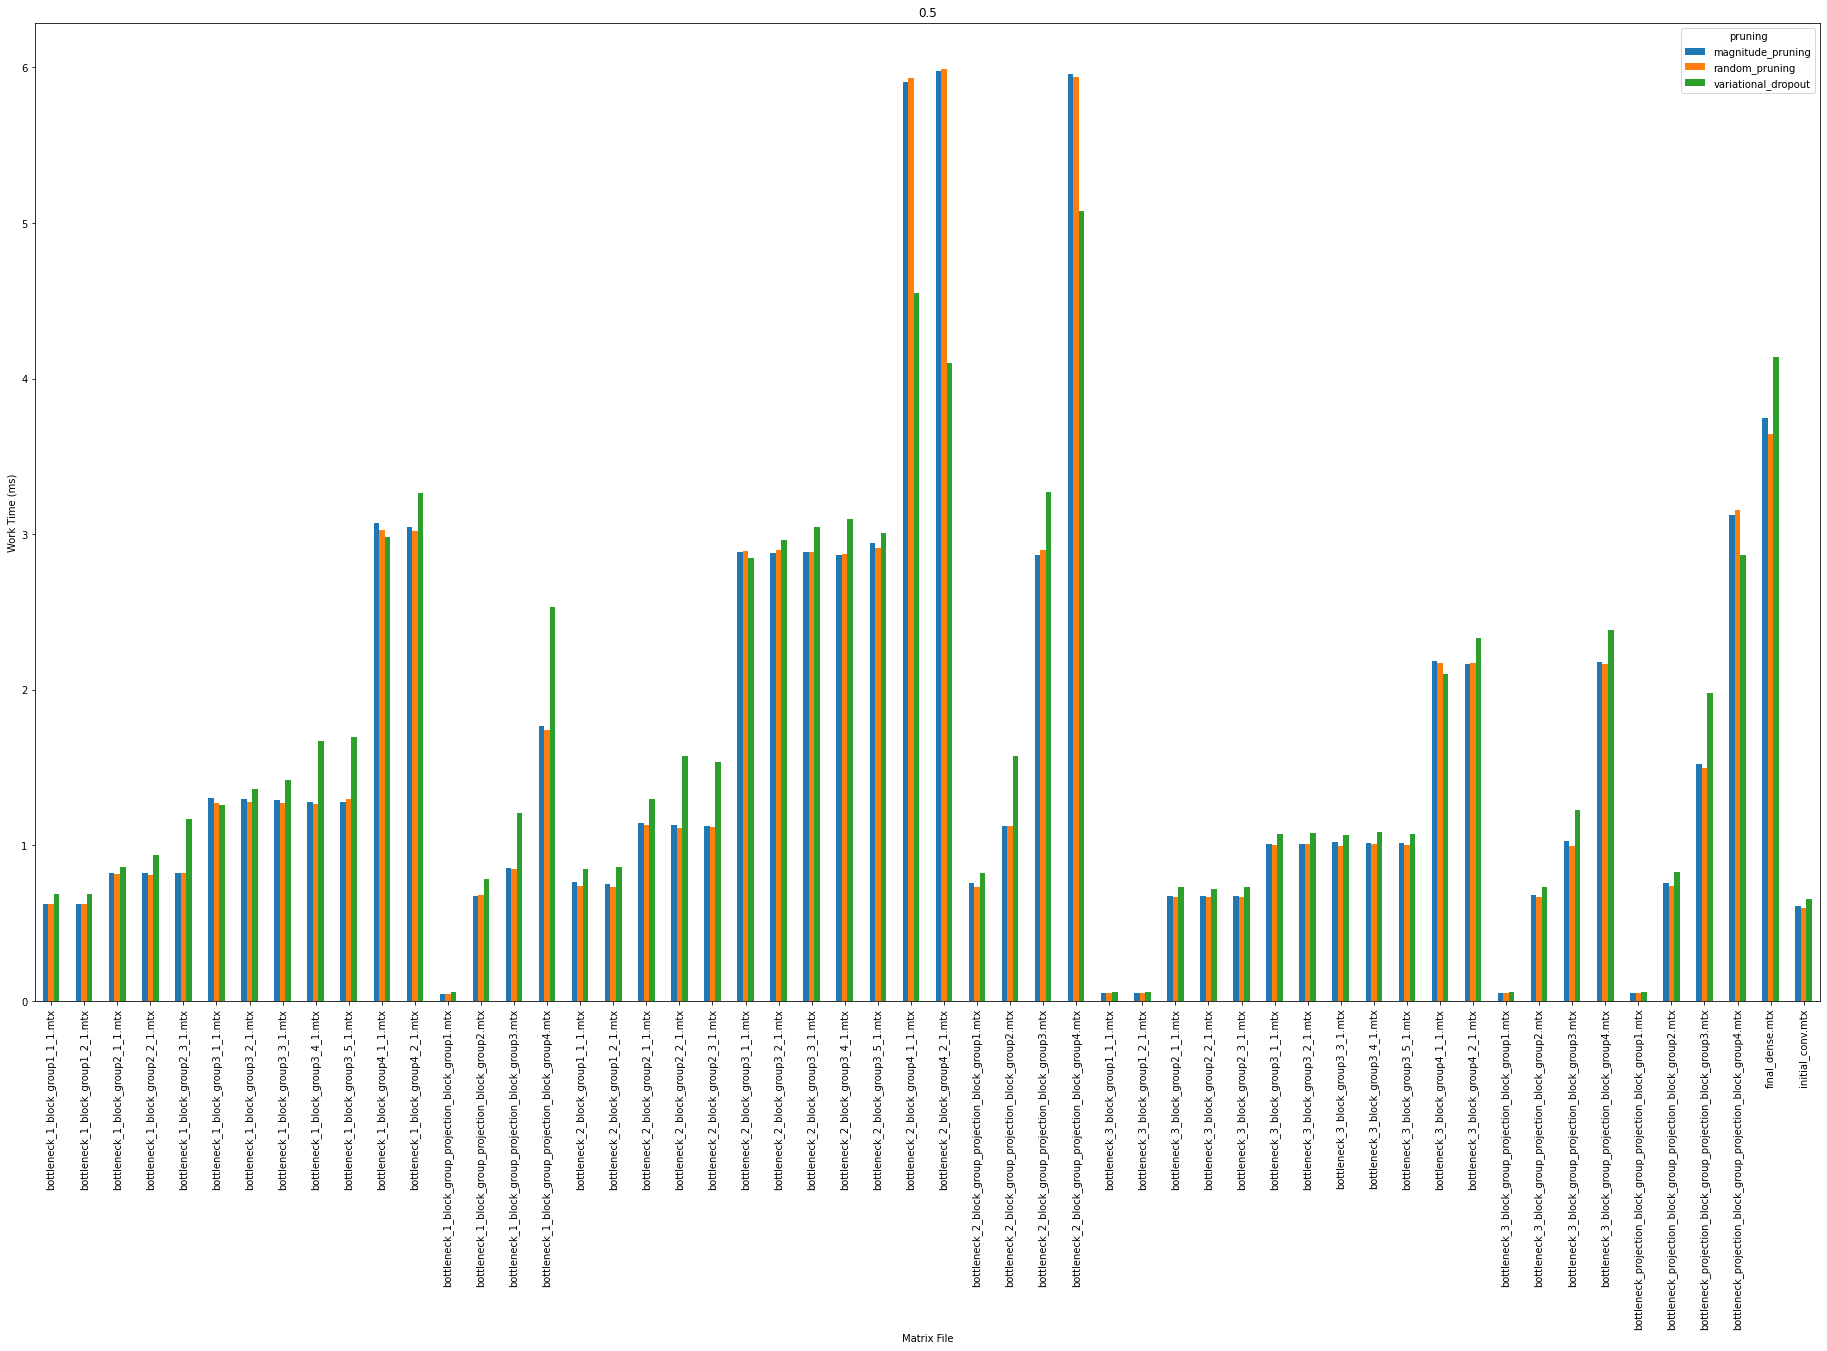

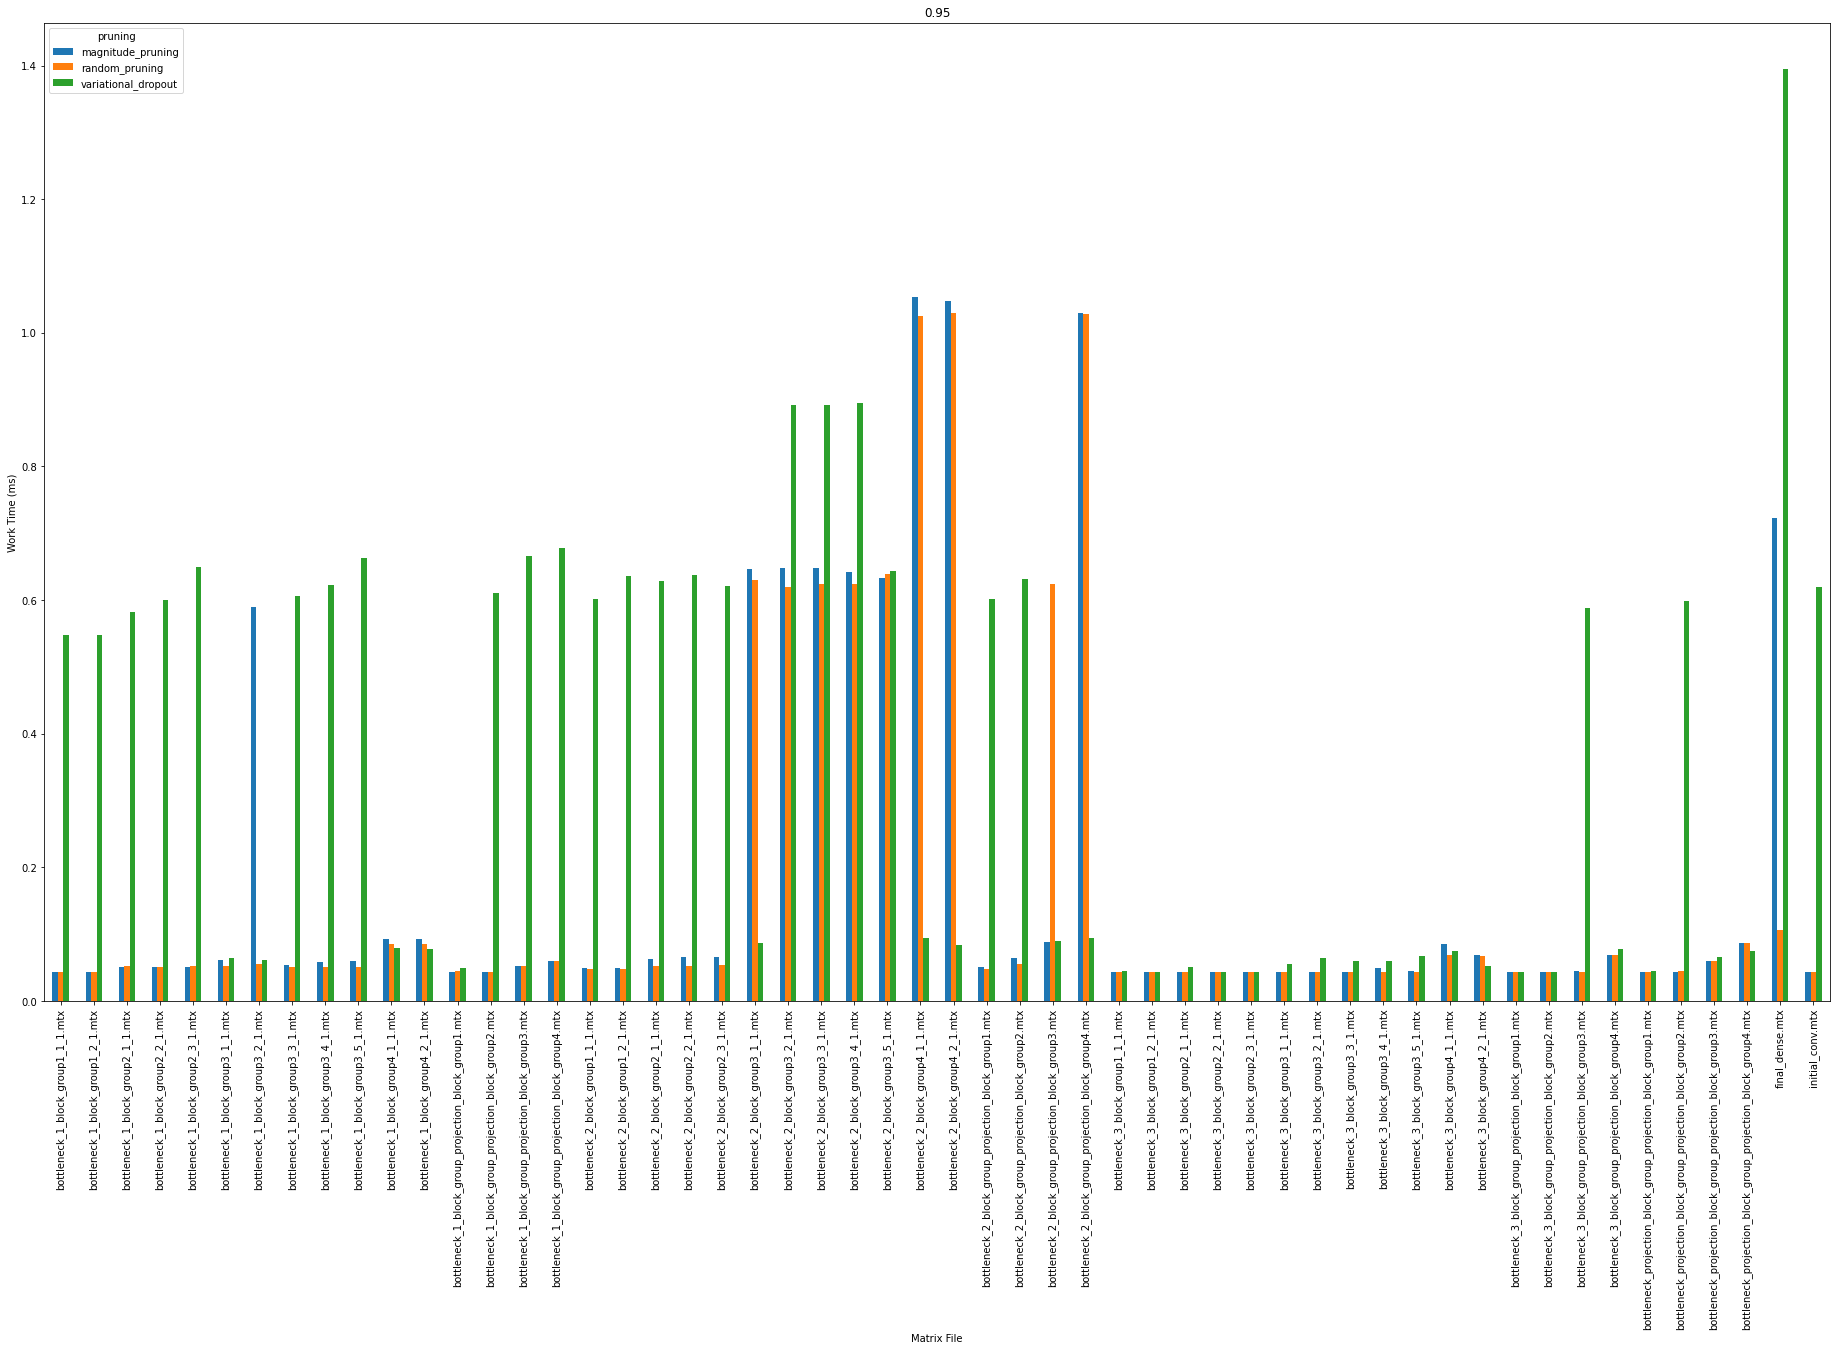

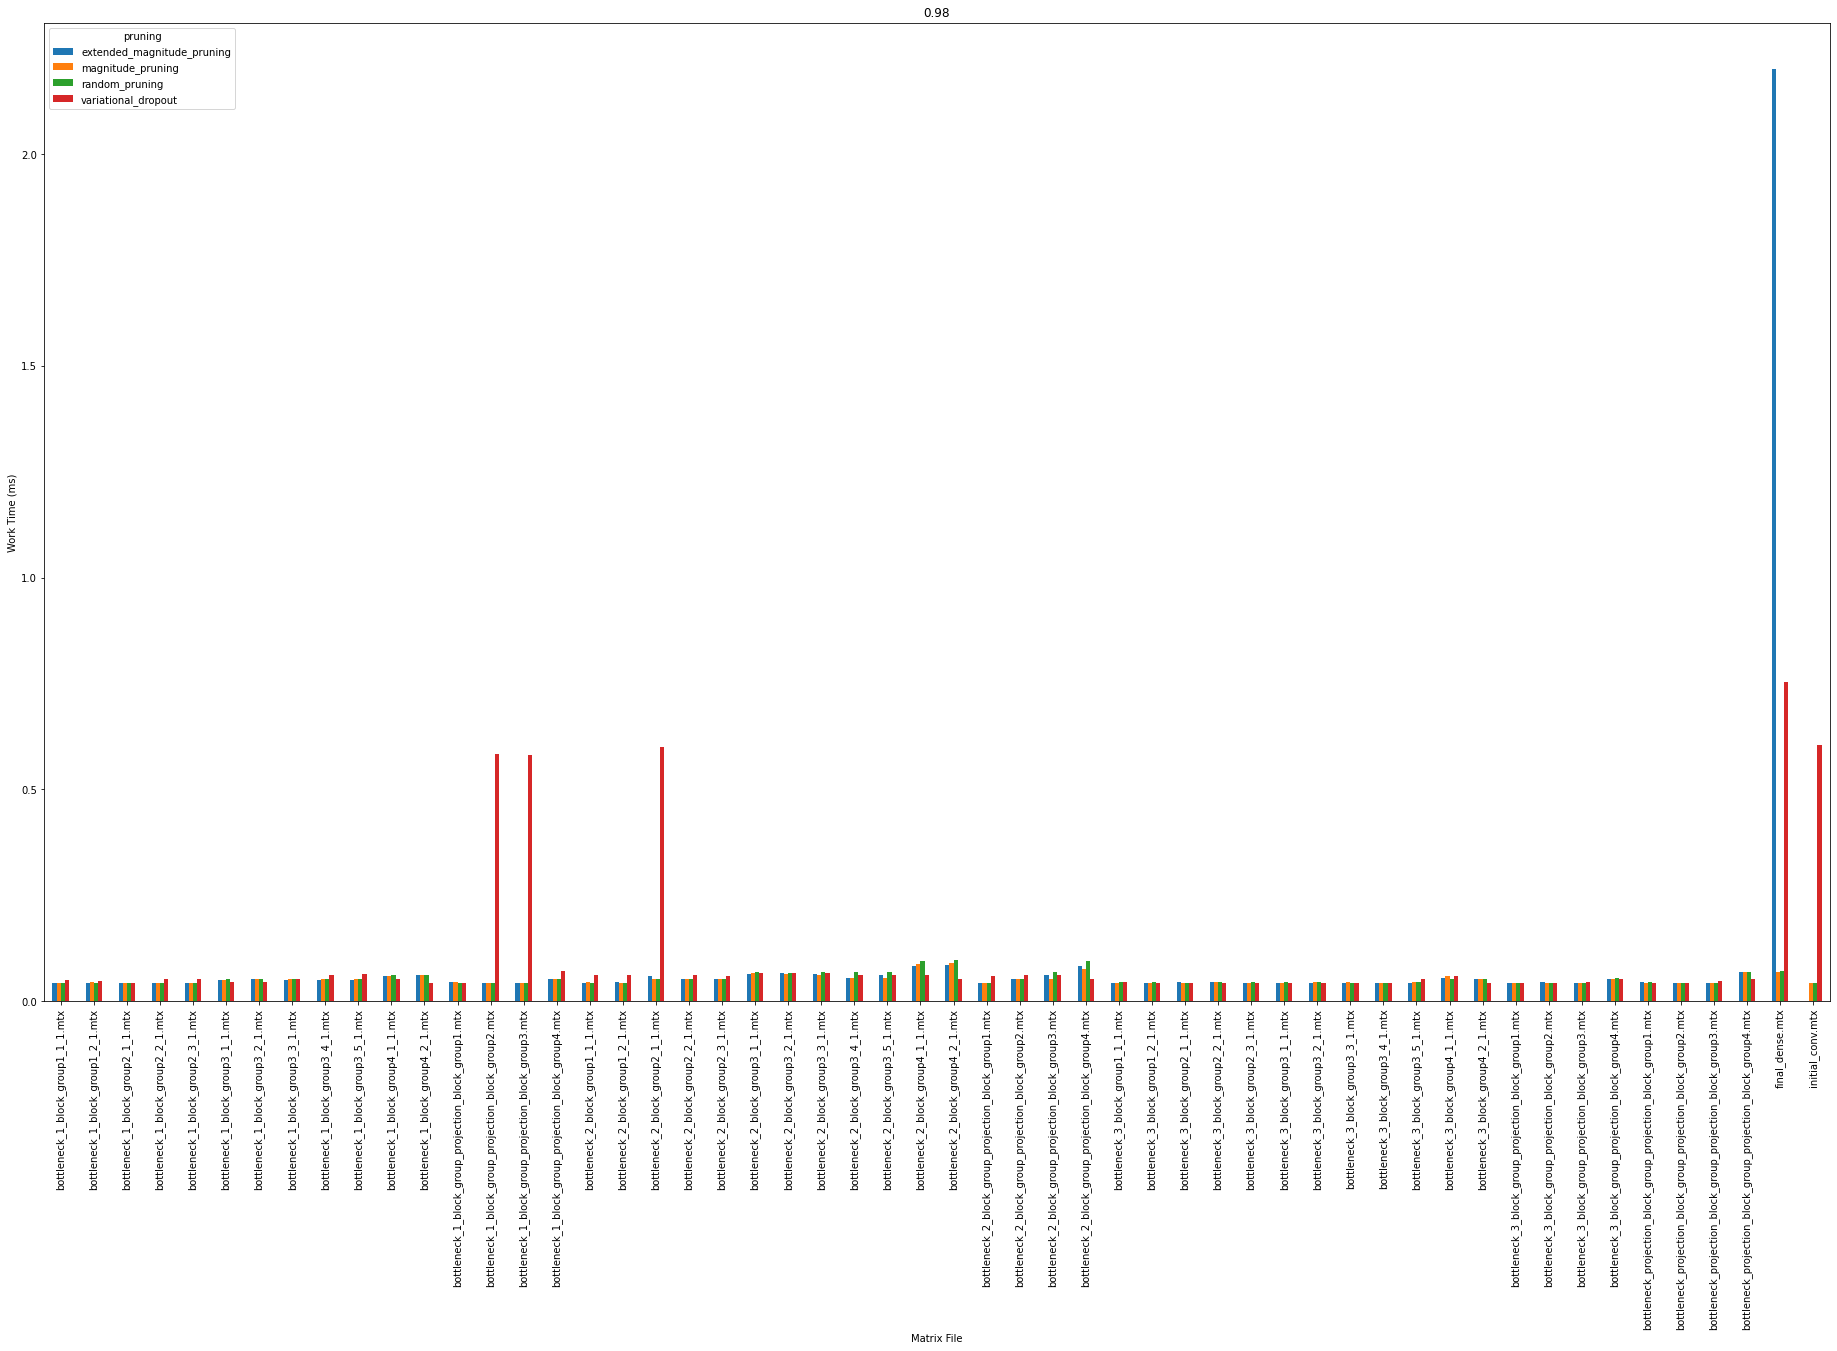

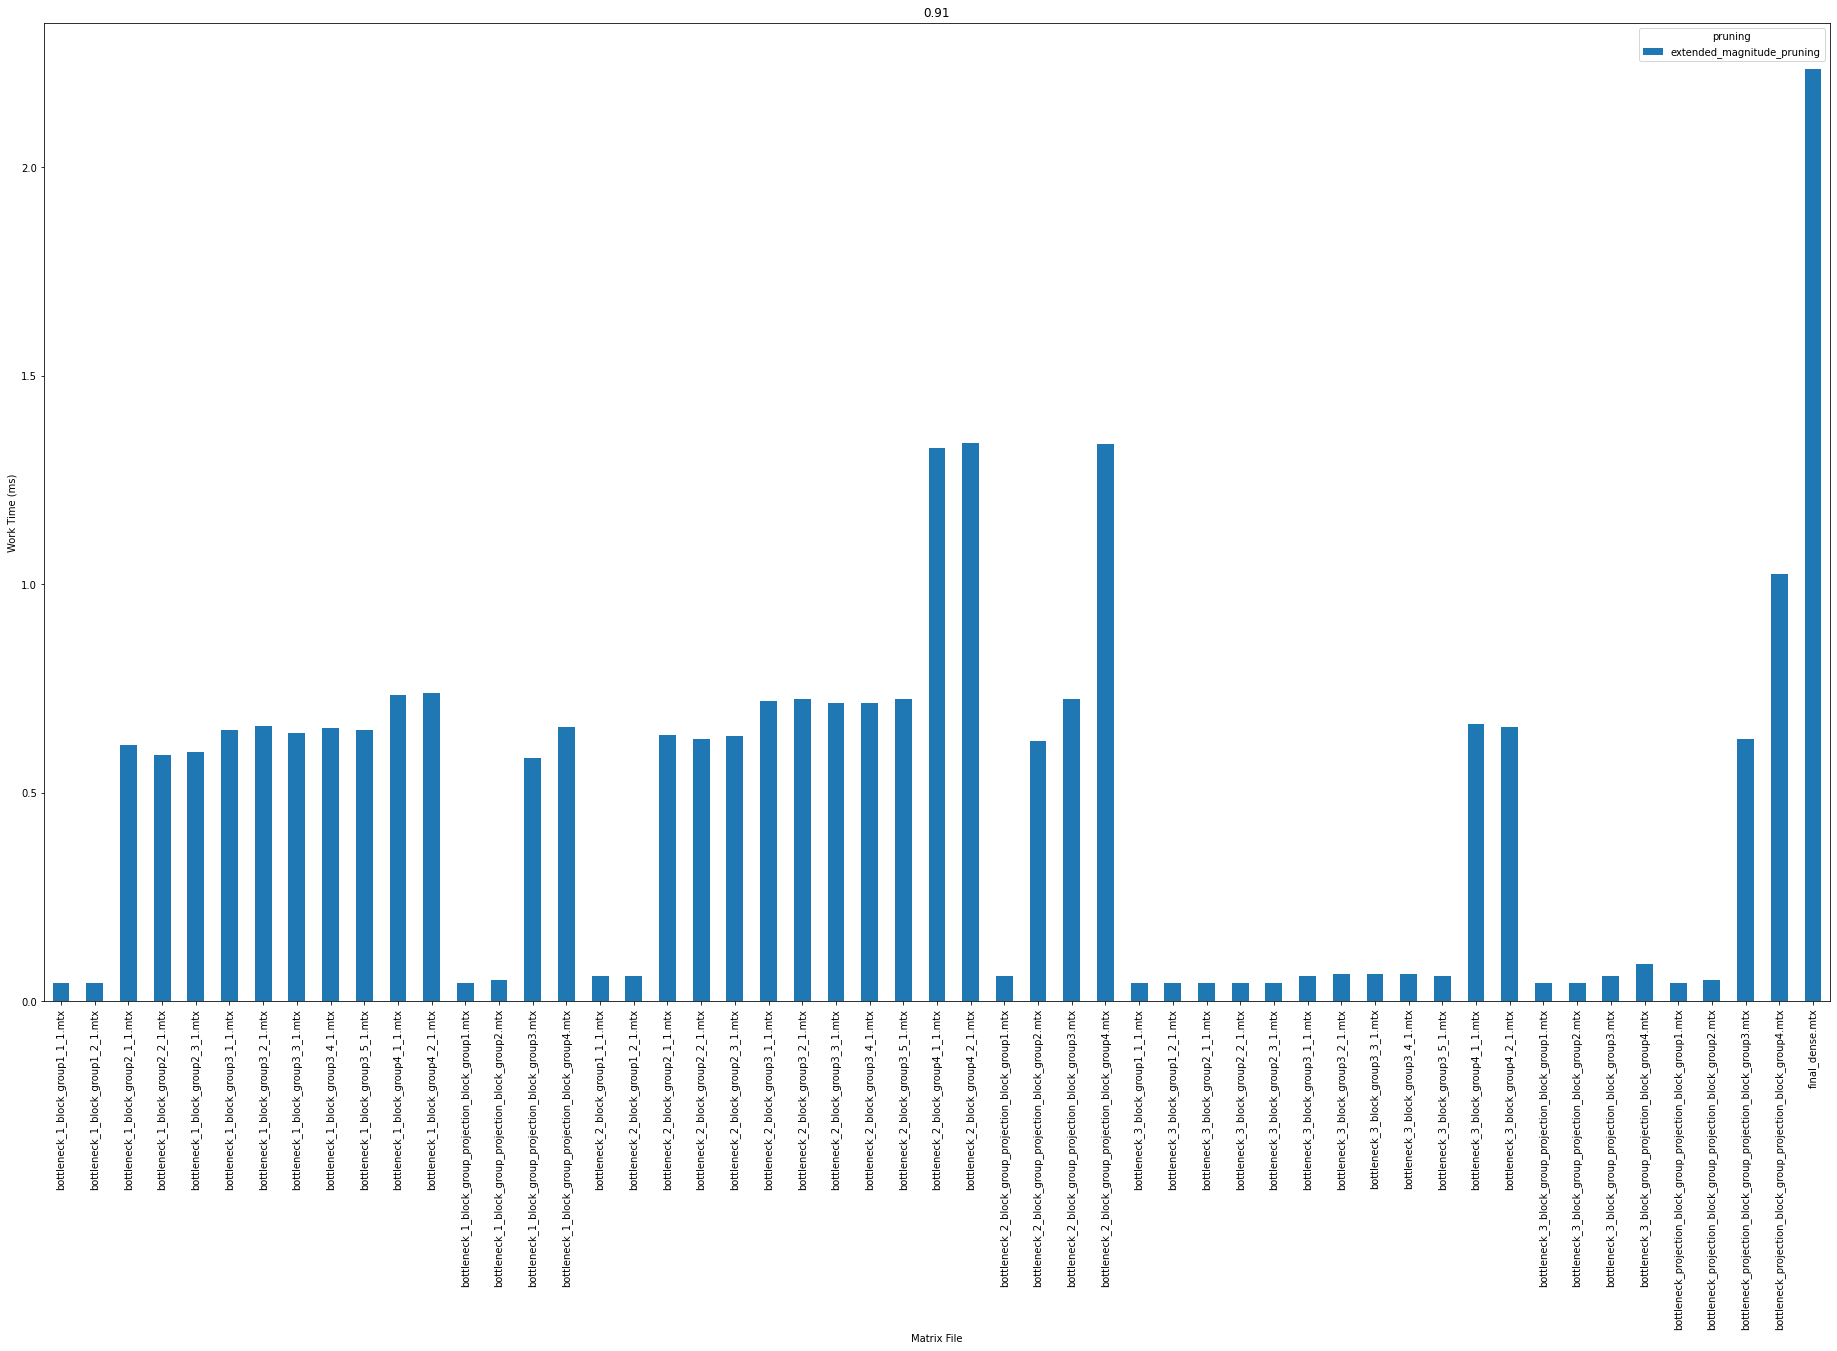

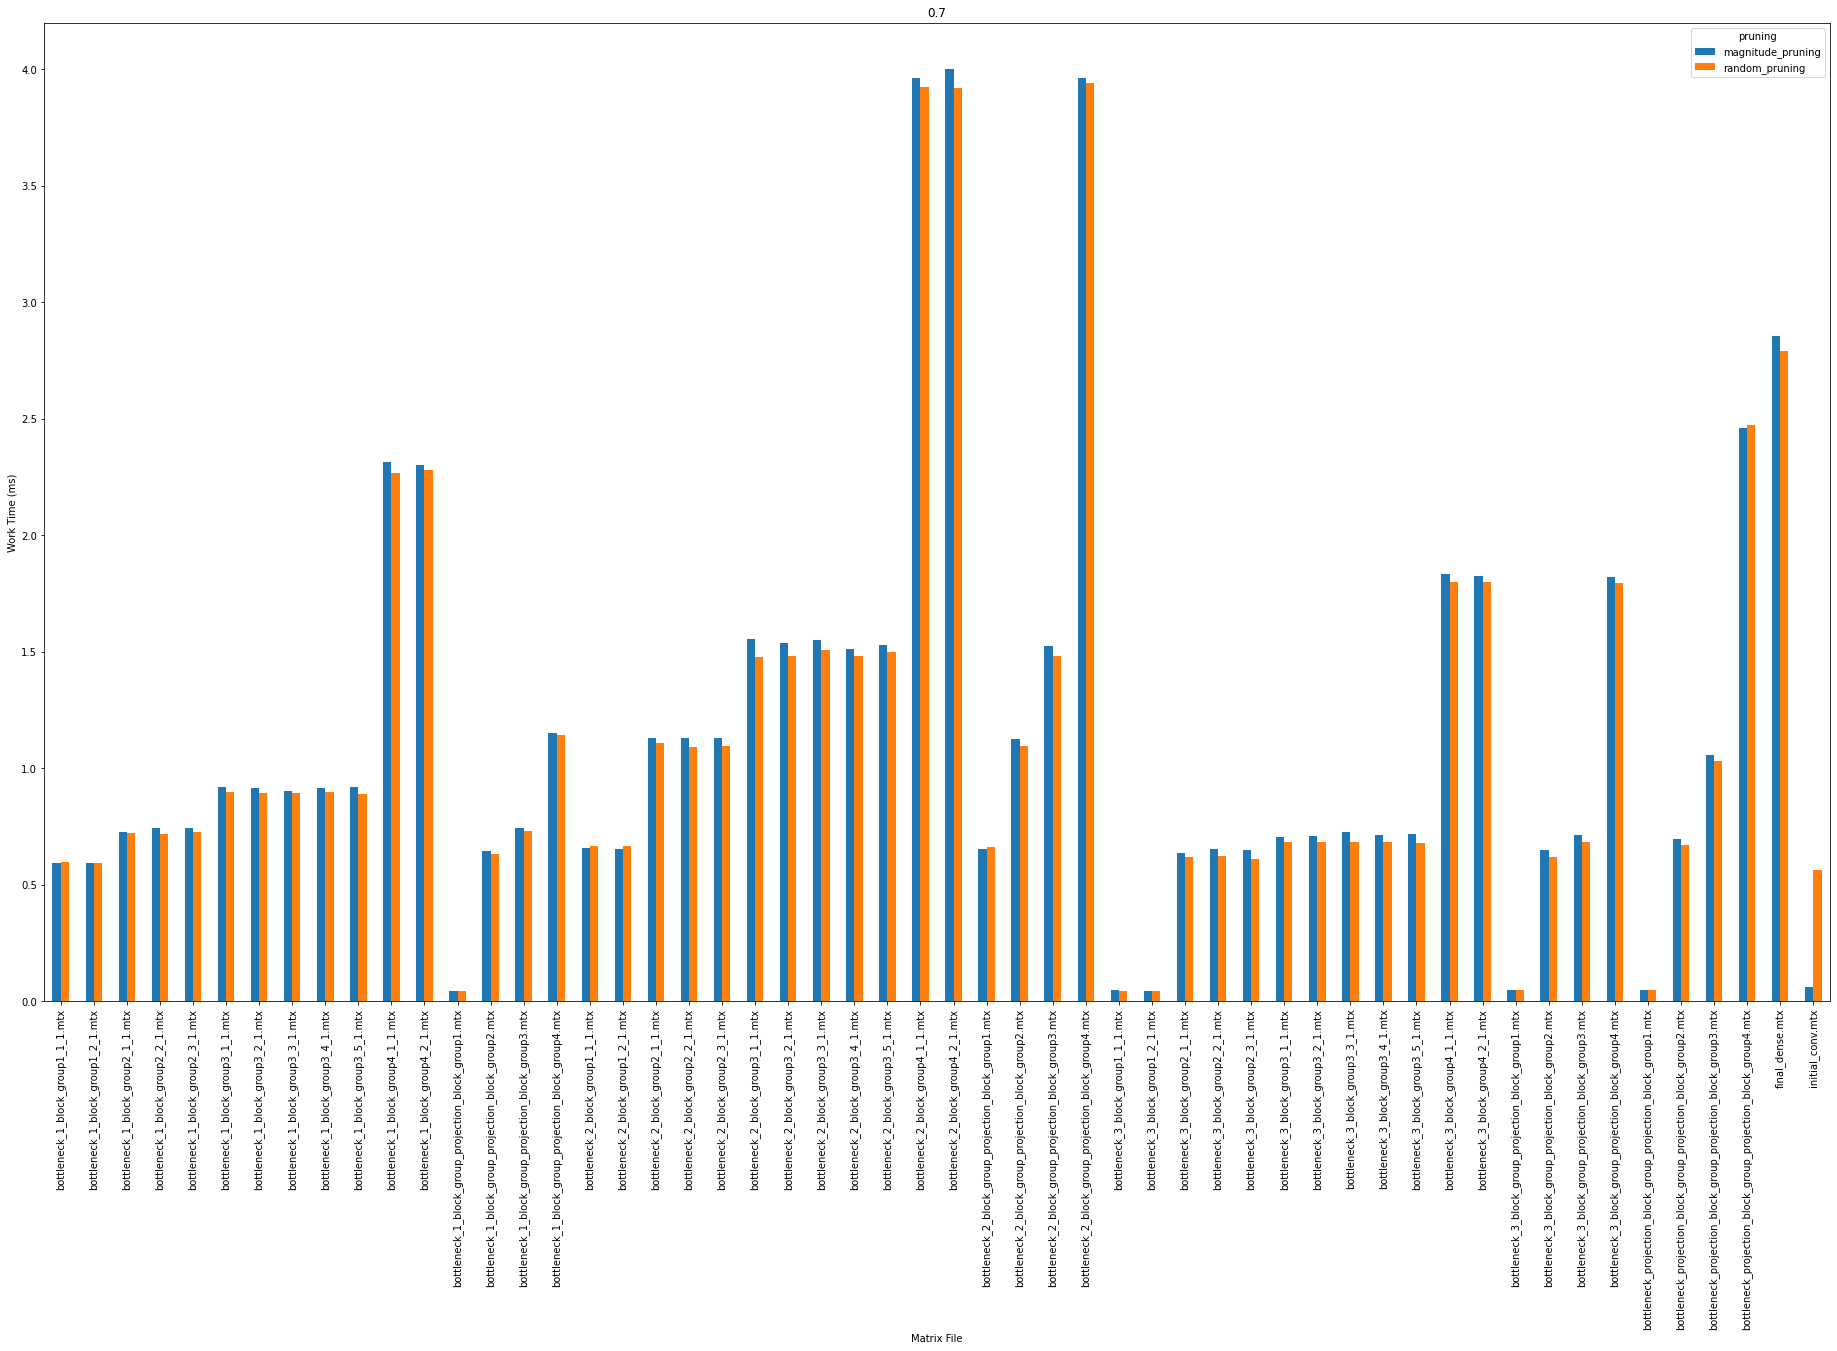

In [12]:
print(list(map(float, set(merged['prune_perc']))))
for prune_perc in set(merged['prune_perc']):
    filtered = merged[(merged['prune_perc']==prune_perc) & (merged['impl'] == 'aspt')]
    filtered.pivot(index='basename', columns='pruning', values='time_ms').plot(
        kind='bar',
        figsize=(32,18),
        title=prune_perc,
        xlabel="Matrix File",
        ylabel="Work Time (ms)"
    )

{'magnitude_pruning', 'extended_magnitude_pruning', 'variational_dropout', 'random_pruning'}


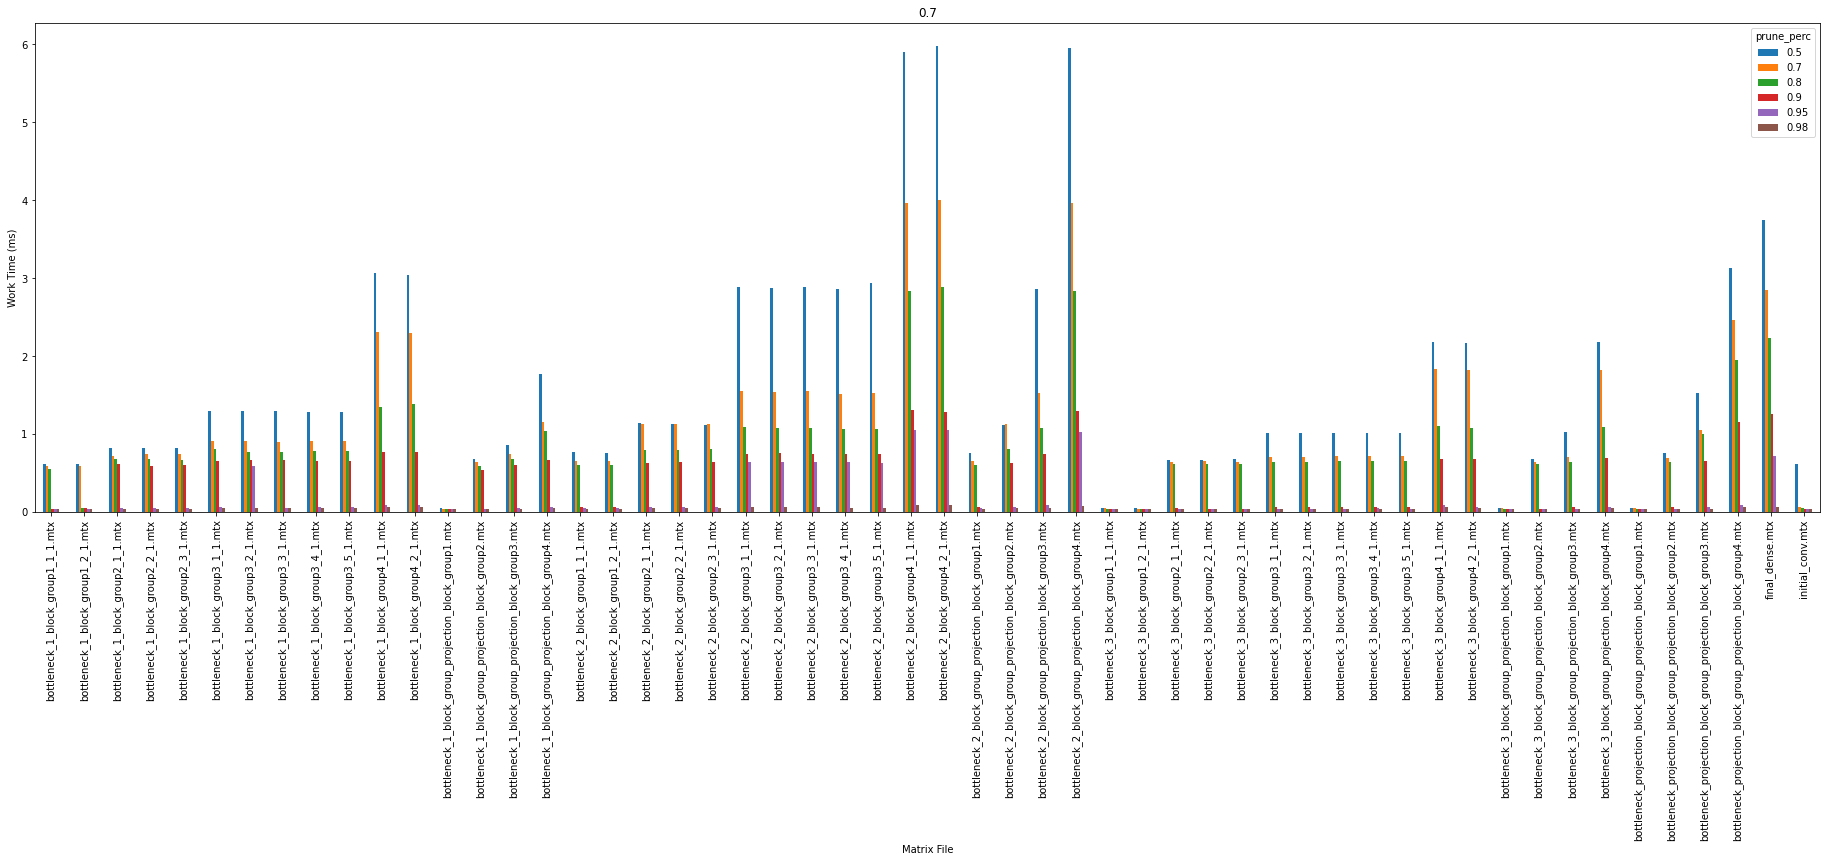

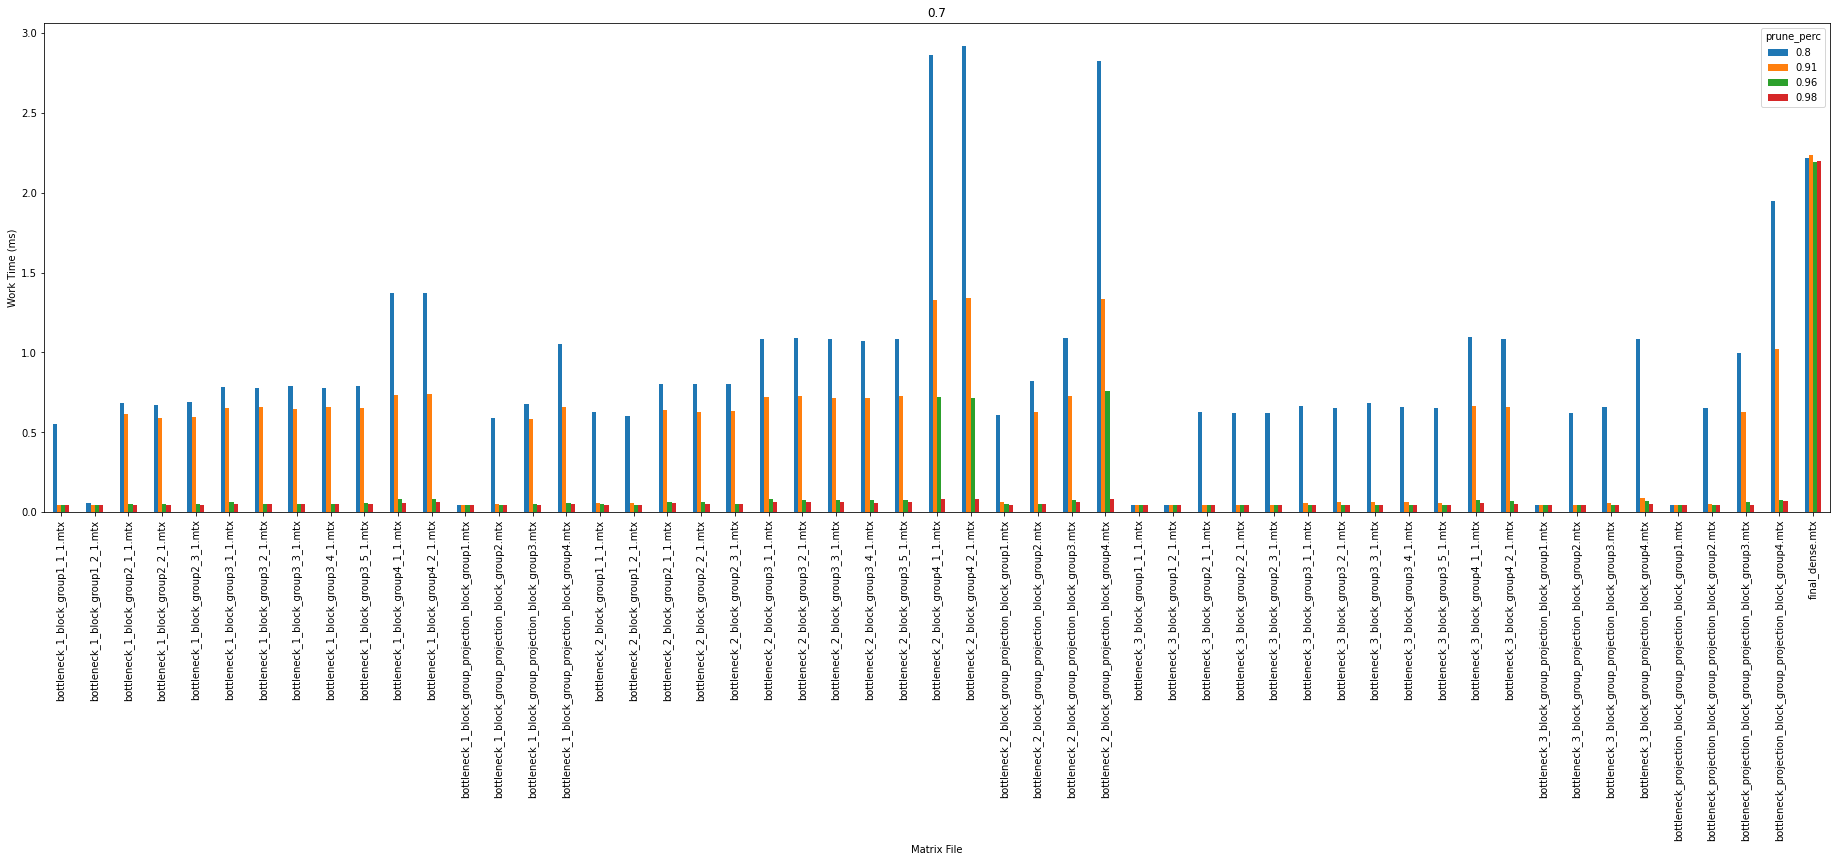

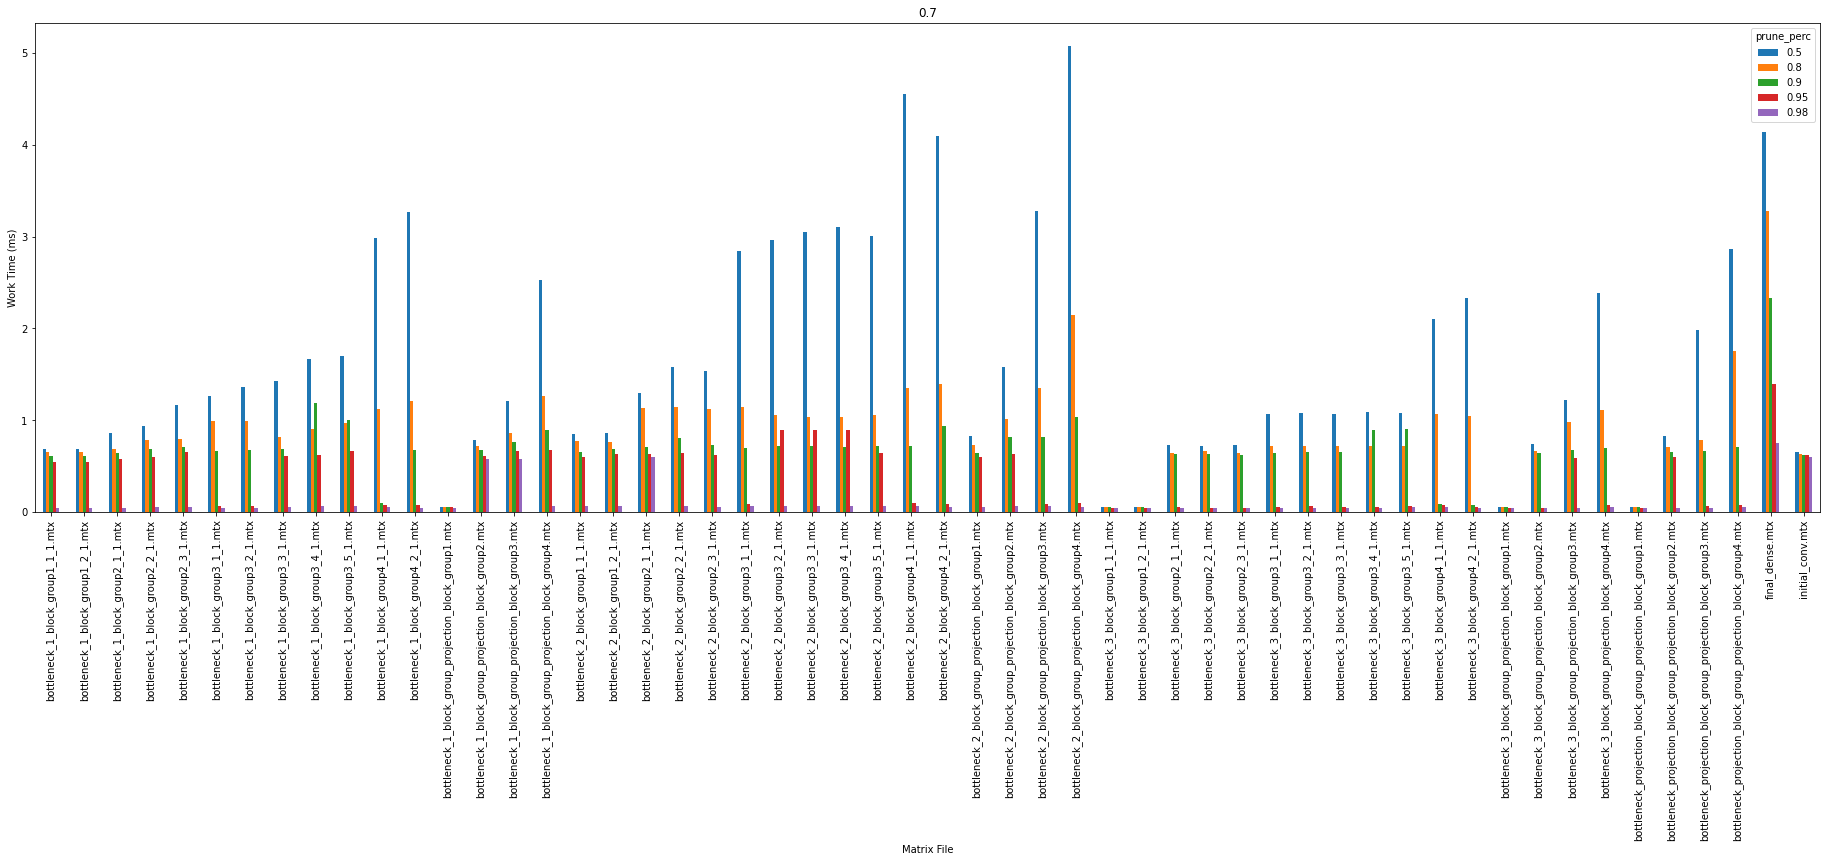

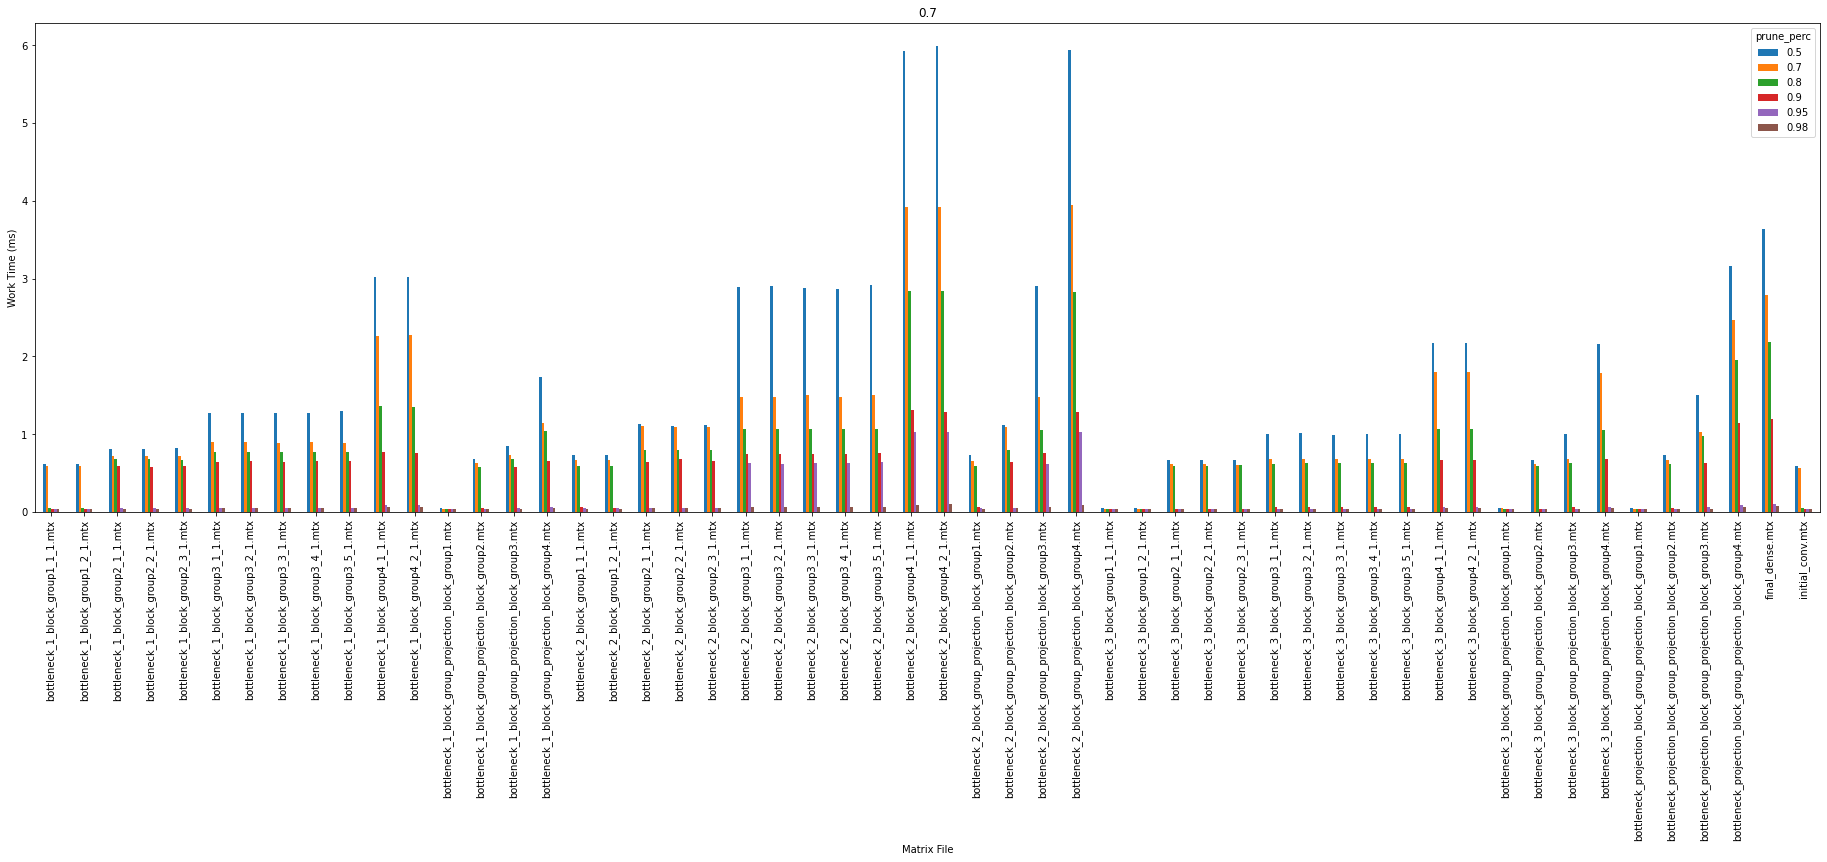

In [11]:
print(set(merged['pruning']))
for pruning_method in set(merged['pruning']):
    filtered = merged[(merged['pruning']==pruning_method) & (merged['impl'] == 'aspt')]
    filtered.pivot(index='basename', columns='prune_perc', values='time_ms').plot(
        kind='bar',
        figsize=(32,9),
        title=prune_perc,
        xlabel="Matrix File",
        ylabel="Work Time (ms)"
    )